# Proyecto Contaminación

# Dynamic Time Wraping (DTW) para la comparación del curso de contaminantes y egresos

# Contaminante NO2

# (Año 2010)

In [1]:
# Se van a agrupar los registros del contaminante en semanas

# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante = 'NO2'
# Se declaran las columnas a extraer de la base de datos
columns = ['timestamp', contaminante]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante = pd.read_csv('filled.csv', usecols=columns).dropna()
# Se convierten los strings a objeto datetime
strfdt = '%d-%b-%y %H'
dataframecontaminante['timestamp'] = pd.to_datetime(dataframecontaminante['timestamp'], errors = 'coerce', format=strfdt)
# Se eliminan los espacios vacios
dataframecontaminante = dataframecontaminante.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante = dataframecontaminante.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante

timestamp        NO2
0       1993-01-01 00:00:00   5.750000
1       1993-01-01 00:00:00  11.000000
2       1993-01-01 00:00:00   6.750000
3       1993-01-01 00:00:00  14.250000
4       1993-01-01 01:00:00   3.250000
...                     ...        ...
1130352 2018-12-31 23:00:00  21.600000
1130353 2018-12-31 23:00:00  31.400000
1130354 2018-12-31 23:00:00   8.400000
1130355 2018-12-31 23:00:00  11.800000
1130356 2018-12-31 23:00:00  59.900002

[1130357 rows x 2 columns]

In [2]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante['timestamp'] = dataframecontaminante['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante

timestamp        NO2
0        1993-01-01 00   5.750000
1        1993-01-01 00  11.000000
2        1993-01-01 00   6.750000
3        1993-01-01 00  14.250000
4        1993-01-01 01   3.250000
...                ...        ...
1130352  2018-12-31 23  21.600000
1130353  2018-12-31 23  31.400000
1130354  2018-12-31 23   8.400000
1130355  2018-12-31 23  11.800000
1130356  2018-12-31 23  59.900002

[1130357 rows x 2 columns]

In [3]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2010'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp      NO2
0      2010-01-01 00   9.1000
1      2010-01-01 00   0.0141
2      2010-01-01 00   9.8000
3      2010-01-01 00   6.9000
4      2010-01-01 00   4.2000
...              ...      ...
57434  2010-12-31 23  38.1000
57435  2010-12-31 23  37.3000
57436  2010-12-31 23   5.0000
57437  2010-12-31 23  20.6000
57438  2010-12-31 23  12.2000

[57439 rows x 2 columns]

In [4]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp      NO2
0     2010-01-01 00:00:00   9.1000
1     2010-01-01 00:00:00   0.0141
2     2010-01-01 00:00:00   9.8000
3     2010-01-01 00:00:00   6.9000
4     2010-01-01 00:00:00   4.2000
...                   ...      ...
57434 2010-12-31 23:00:00  38.1000
57435 2010-12-31 23:00:00  37.3000
57436 2010-12-31 23:00:00   5.0000
57437 2010-12-31 23:00:00  20.6000
57438 2010-12-31 23:00:00  12.2000

[57439 rows x 2 columns]

In [5]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp      NO2  sem
0     2010-01-01 00:00:00   9.1000   52
1     2010-01-01 00:00:00   0.0141   52
2     2010-01-01 00:00:00   9.8000   52
3     2010-01-01 00:00:00   6.9000   52
4     2010-01-01 00:00:00   4.2000   52
...                   ...      ...  ...
57434 2010-12-31 23:00:00  38.1000   52
57435 2010-12-31 23:00:00  37.3000   52
57436 2010-12-31 23:00:00   5.0000   52
57437 2010-12-31 23:00:00  20.6000   52
57438 2010-12-31 23:00:00  12.2000   52

[57439 rows x 3 columns]

In [6]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        19/01/2010     O829
1        16/02/2010     J189
2        23/03/2010     N814
3        17/04/2010     O759
4        22/05/2010     K359
...             ...      ...
2634334  21/07/2010     O064
2634335  21/05/2010     S822
2634336  23/03/2010     K802
2634337  17/08/2010     O809
2634338  21/12/2010     C629

[2634339 rows x 2 columns]

In [7]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2010-01-19     O829    3
1       2010-02-16     J189    7
2       2010-03-23     N814   12
3       2010-04-17     O759   15
4       2010-05-22     K359   20
...            ...      ...  ...
2597279 2010-07-21     O064   29
2597280 2010-05-21     S822   20
2597281 2010-03-23     K802   12
2597282 2010-08-17     O809   33
2597283 2010-12-21     C629   51

[2597284 rows x 3 columns]

In [8]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     43463
2     48020
3     49300
4     50404
5     46716
6     50279
7     49462
8     50102
9     51123
10    52219
11    48527
12    51158
13    46652
14    48200
15    49187
16    49499
17    51348
18    48072
19    50004
20    50627
21    51101
22    51157
23    51436
24    49970
25    49757
26    49682
27    50141
28    50981
29    50164
30    50925
31    51991
32    52355
33    52240
34    53192
35    54220
36    55165
37    48947
38    54466
39    54926
40    54540
41    54019
42    54255
43    52924
44    47914
45    52907
46    50233
47    52802
48    51769
49    51864
50    51110
51    47295
52     8474
Name: sem, dtype: int64

In [9]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NO2
0     1  14.5539
1     2  16.3425
2     3  23.8509
3     4  16.4663
4     5  18.6122
5     6  15.7925
6     7  17.7225
7     8  16.8863
8     9  14.8775
9    10  19.3877
10   11  17.0549
11   12  20.9929
12   13  17.0587
13   14  15.2696
14   15  12.4479
15   16  16.4566
16   17  19.8972
17   18  18.6514
18   19  15.4072
19   20  14.0376
20   21  10.2732
21   22  19.3192
22   23  13.5247
23   24   8.6142
24   25  8.72651
25   26  9.98612
26   27  11.5659
27   28  9.15296
28   29  8.03986
29   30  9.00923
30   31  11.2536
31   32  10.6774
32   33   10.364
33   34  15.9277
34   35  10.0925
35   36  11.0977
36   37  7.19856
37   38  8.38726
38   39   16.608
39   40  14.2928
40   41  16.8545
41   42  13.4197
42   43  21.1641
43   44  22.3637
44   45  19.8652
45   46  23.0179
46   47  18.1388
47   48  26.4024
48   49  25.8868
49   50  24.0428
50   51   22.019
51   52  18.8507


2010

NO2 & O809


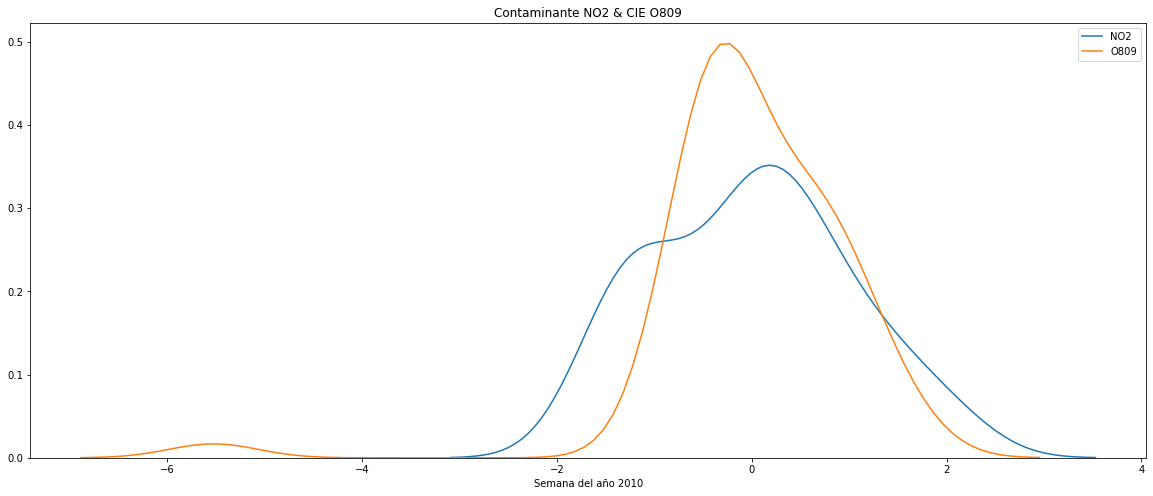


NO2 & O829


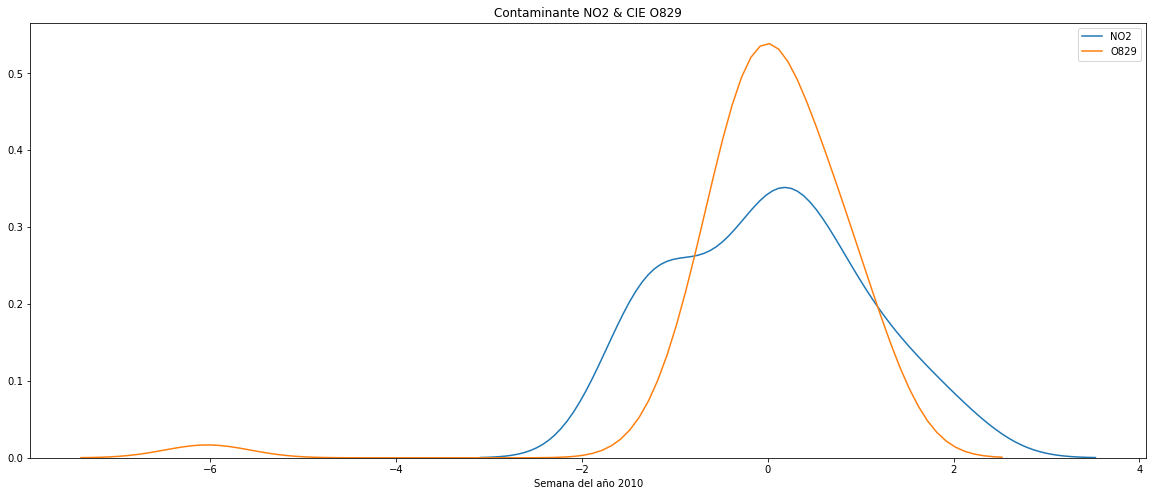


NO2 & O800


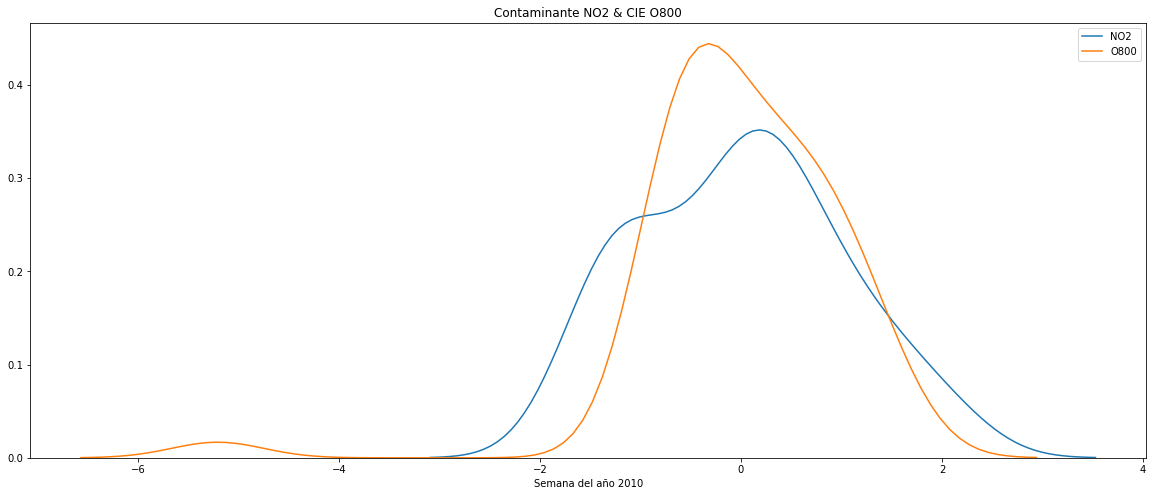


NO2 & O064


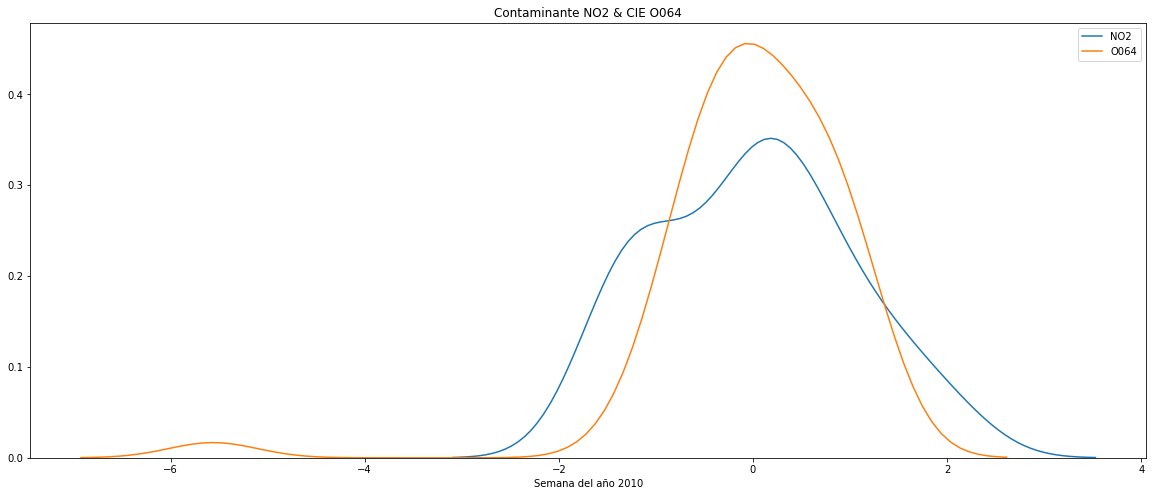


NO2 & N189


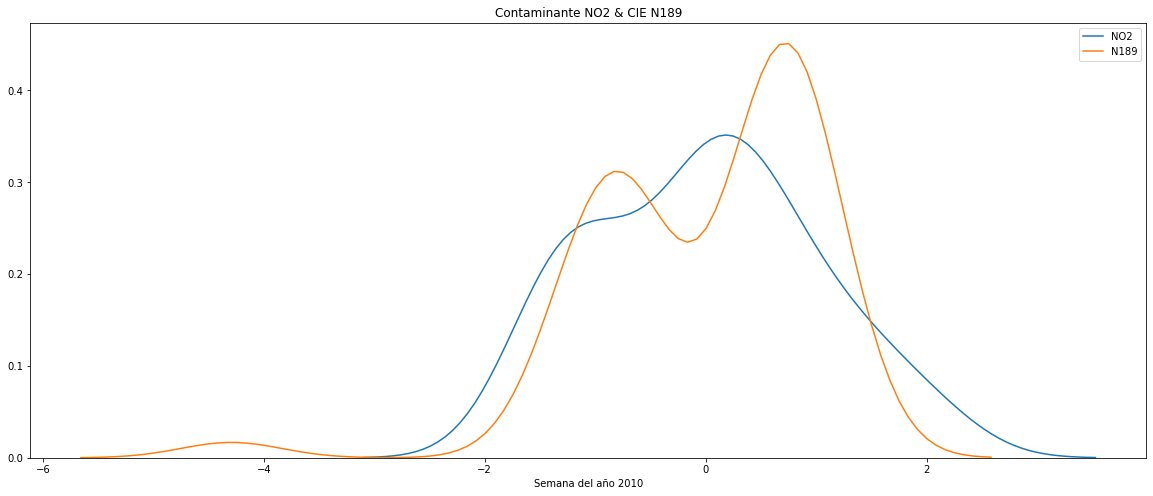


NO2 & O342


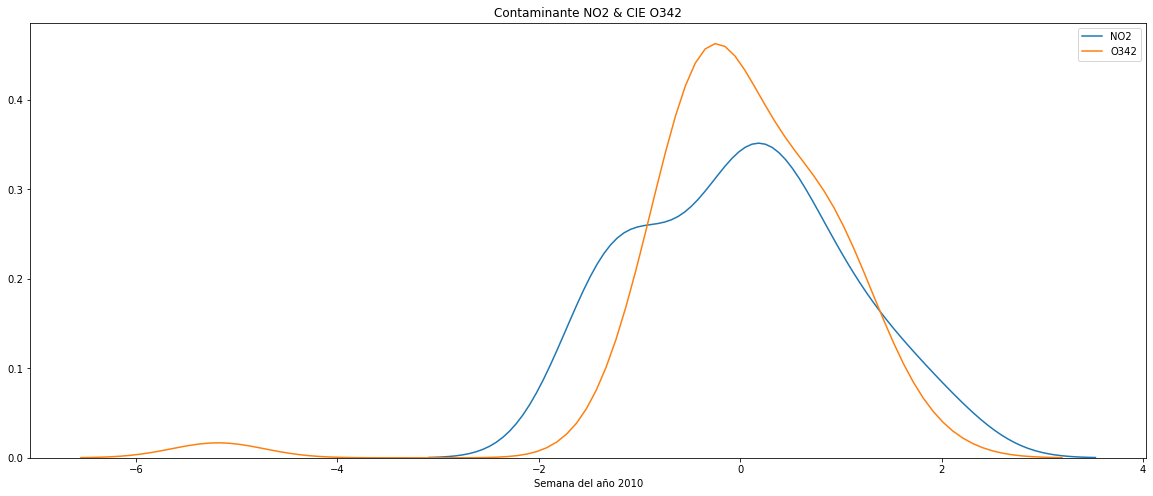


NO2 & K359


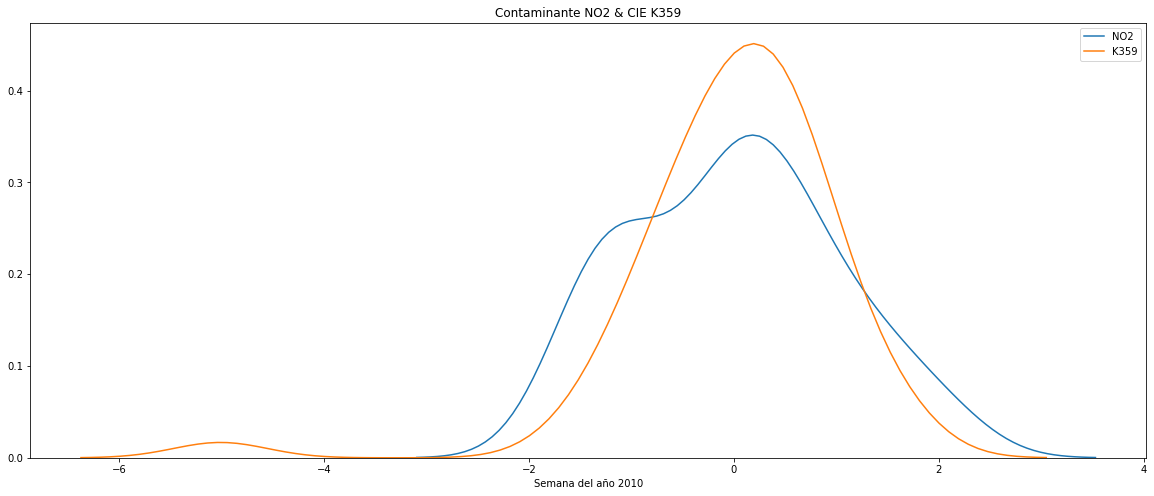


NO2 & H


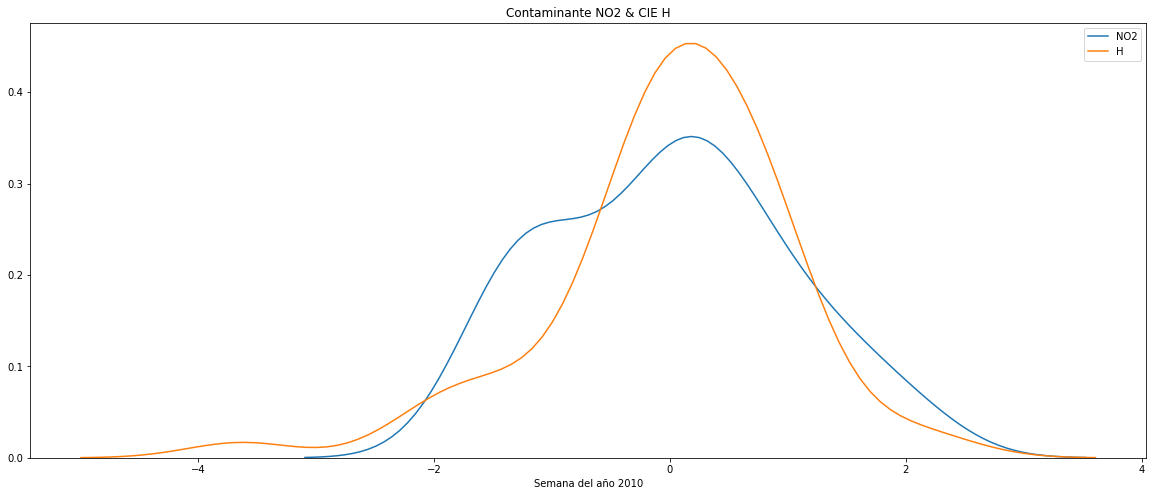


NO2 & I


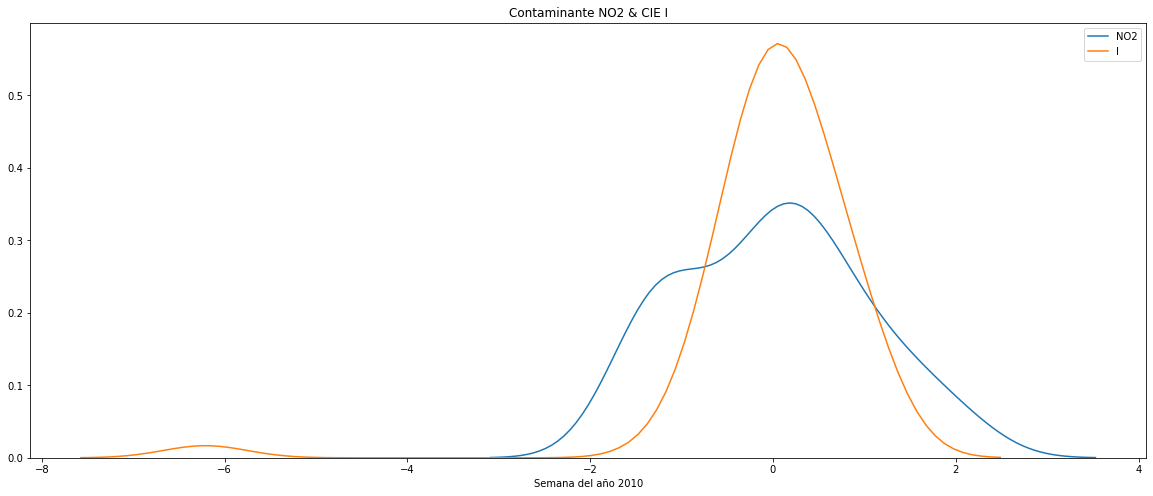


NO2 & J


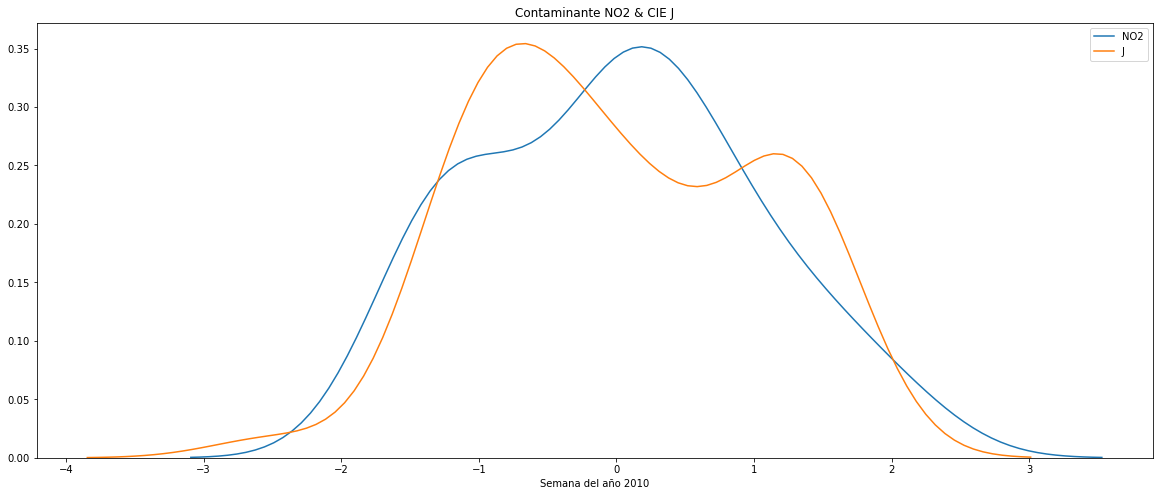

In [10]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2011)


In [11]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2011'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   NO2
0      2011-01-01 00  35.7
1      2011-01-01 00  24.2
2      2011-01-01 00  41.8
3      2011-01-01 00  33.8
4      2011-01-01 00   4.4
...              ...   ...
64120  2011-12-31 23  66.6
64121  2011-12-31 23  71.9
64122  2011-12-31 23  25.6
64123  2011-12-31 23  24.3
64124  2011-12-31 23  80.5

[64125 rows x 2 columns]

In [12]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   NO2
0     2011-01-01 00:00:00  35.7
1     2011-01-01 00:00:00  24.2
2     2011-01-01 00:00:00  41.8
3     2011-01-01 00:00:00  33.8
4     2011-01-01 00:00:00   4.4
...                   ...   ...
64120 2011-12-31 23:00:00  66.6
64121 2011-12-31 23:00:00  71.9
64122 2011-12-31 23:00:00  25.6
64123 2011-12-31 23:00:00  24.3
64124 2011-12-31 23:00:00  80.5

[64125 rows x 2 columns]

In [13]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   NO2  sem
0     2011-01-01 00:00:00  35.7   52
1     2011-01-01 00:00:00  24.2   52
2     2011-01-01 00:00:00  41.8   52
3     2011-01-01 00:00:00  33.8   52
4     2011-01-01 00:00:00   4.4   52
...                   ...   ...  ...
64120 2011-12-31 23:00:00  66.6   52
64121 2011-12-31 23:00:00  71.9   52
64122 2011-12-31 23:00:00  25.6   52
64123 2011-12-31 23:00:00  24.3   52
64124 2011-12-31 23:00:00  80.5   52

[64125 rows x 3 columns]

In [14]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        22/03/2011     T311
1        22/03/2011     K579
2        22/03/2011     L039
3        04/04/2011     K359
4        05/04/2011     J189
...             ...      ...
1048567  21/09/2011     I091
1048568  21/09/2011     I350
1048569  22/09/2011     I471
1048570  22/09/2011     I739
1048571  23/09/2011     I258

[1048559 rows x 2 columns]

In [15]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2011-03-22     T311   12
1       2011-03-22     K579   12
2       2011-03-22     L039   12
3       2011-04-04     K359   14
4       2011-04-05     J189   14
...            ...      ...  ...
1032381 2011-09-21     I091   38
1032382 2011-09-21     I350   38
1032383 2011-09-22     I471   38
1032384 2011-09-22     I739   38
1032385 2011-09-23     I258   38

[1032386 rows x 3 columns]

In [16]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     17352
2     18696
3     19496
4     19507
5     19332
6     18294
7     19327
8     19752
9     19824
10    19289
11    19828
12    18756
13    19630
14    19820
15    19684
16    17260
17    18346
18    17878
19    18577
20    19349
21    19384
22    19016
23    19569
24    19636
25    19737
26    19807
27    19845
28    20238
29    20570
30    20463
31    20628
32    21214
33    21237
34    21296
35    21472
36    21765
37    20779
38    21674
39    23011
40    22644
41    22416
42    22546
43    22094
44    20010
45    22360
46    21769
47    21130
48    21236
49    20987
50    20903
51    19862
52     3091
Name: sem, dtype: int64

In [17]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NO2
0     1  21.6953
1     2  14.6937
2     3  21.4954
3     4  23.3155
4     5  19.1667
5     6  23.3339
6     7   25.388
7     8  18.6494
8     9  21.5606
9    10  19.6265
10   11  14.7227
11   12  14.7839
12   13   16.274
13   14  17.5305
14   15   16.141
15   16  13.5654
16   17  15.3916
17   18  12.1016
18   19  13.8882
19   20  13.9652
20   21  14.0065
21   22  9.23644
22   23  11.5147
23   24  11.8871
24   25  12.6328
25   26  9.34453
26   27  9.26977
27   28  7.52619
28   29  10.8246
29   30   8.5747
30   31  8.80707
31   32   10.246
32   33  9.21223
33   34  10.7699
34   35  13.6827
35   36  17.1854
36   37  10.6366
37   38  13.8381
38   39  15.2518
39   40  10.2356
40   41  16.3027
41   42  19.4167
42   43  16.0078
43   44  19.3747
44   45  16.4529
45   46  21.4381
46   47  15.3302
47   48  21.8803
48   49  19.6767
49   50  19.6161
50   51  18.0773
51   52  26.7657


2011

NO2 & O809


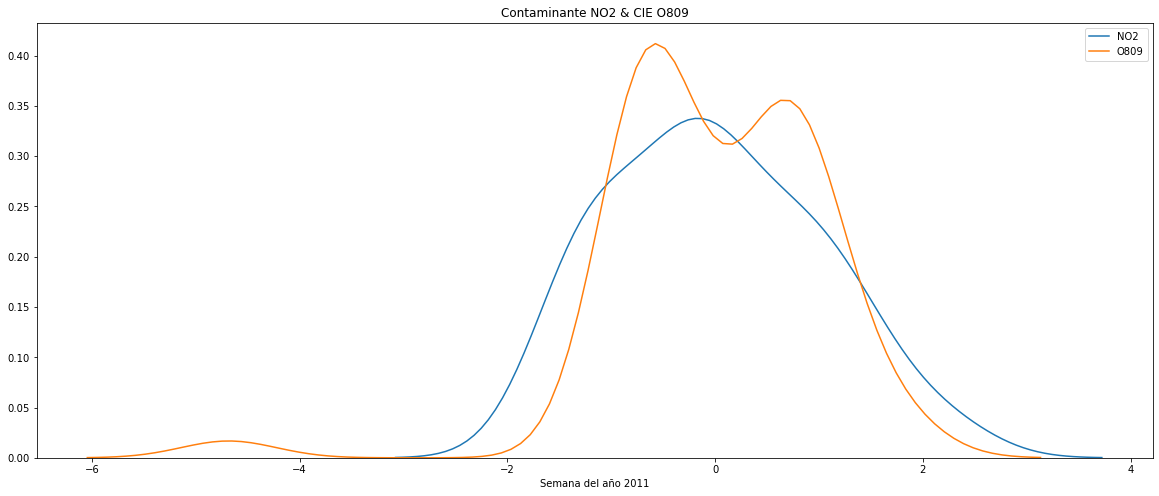


NO2 & O800


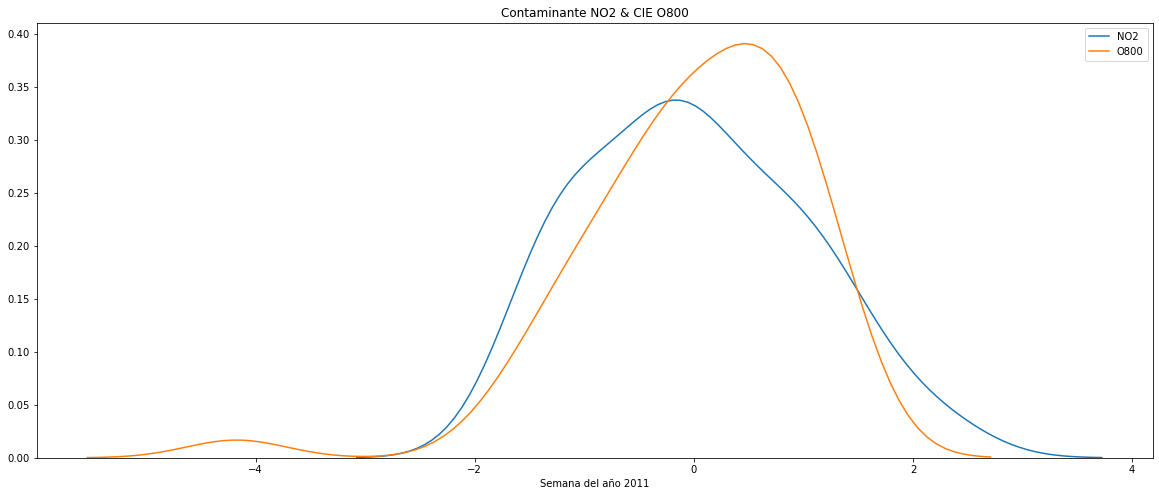


NO2 & O064


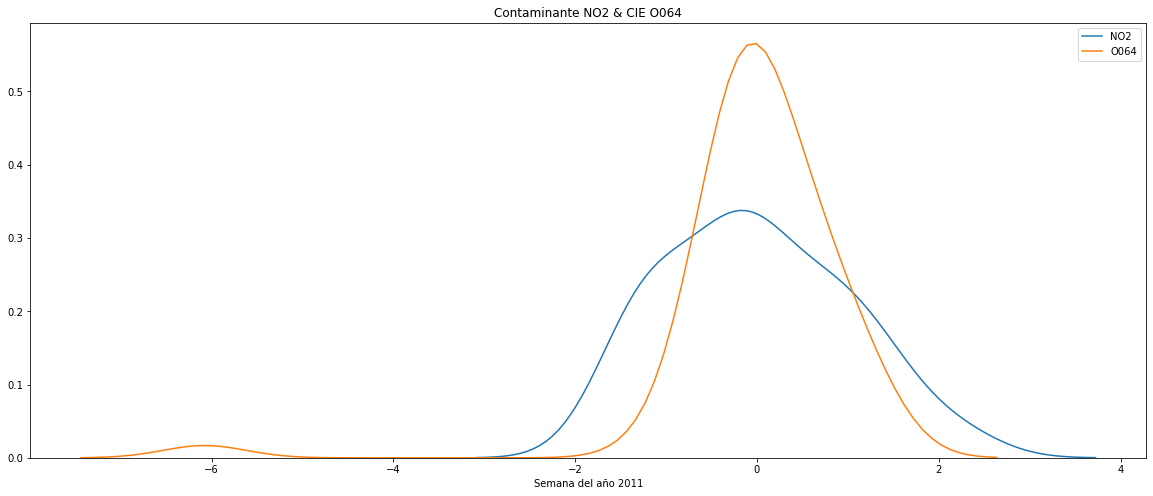


NO2 & O342


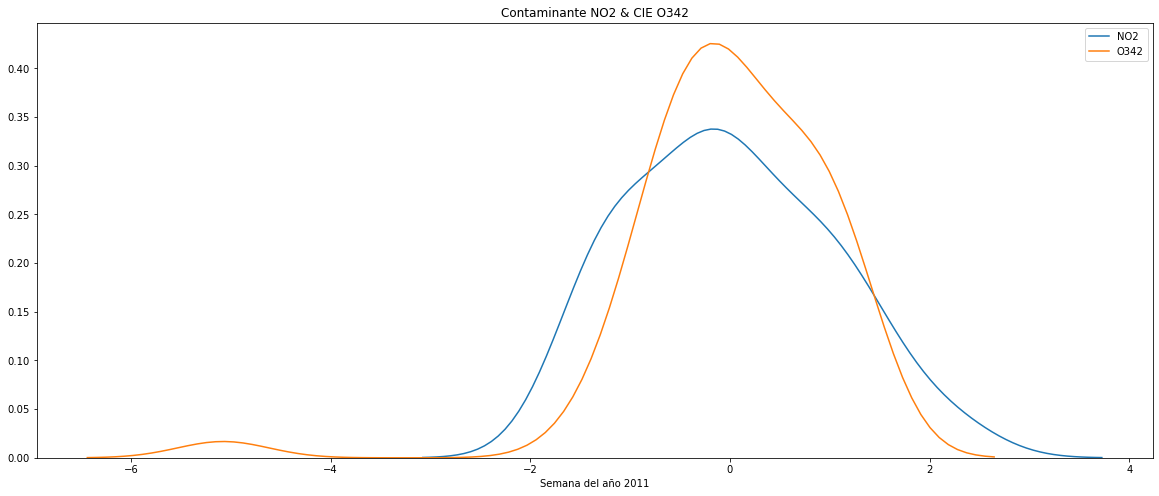


NO2 & O829


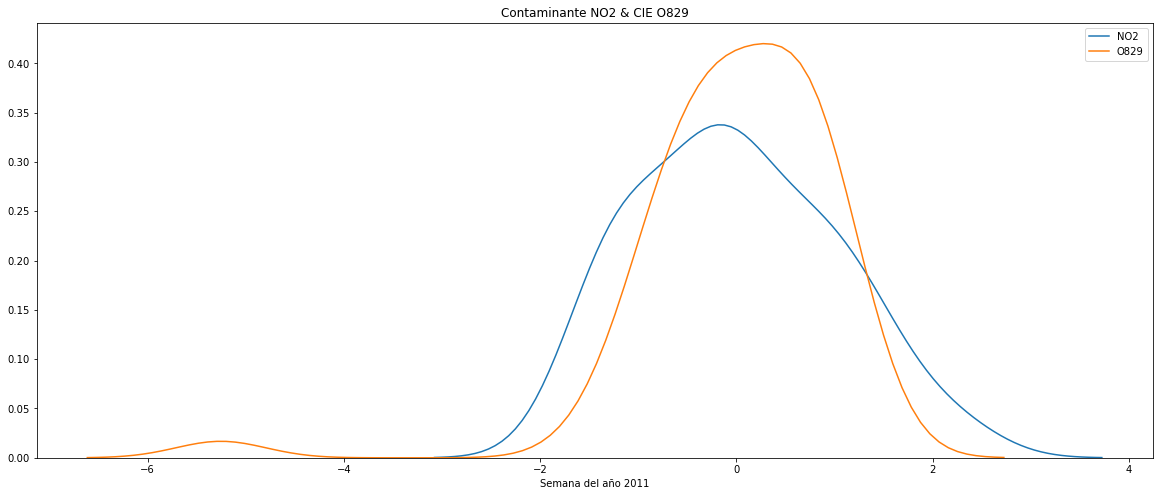


NO2 & N189


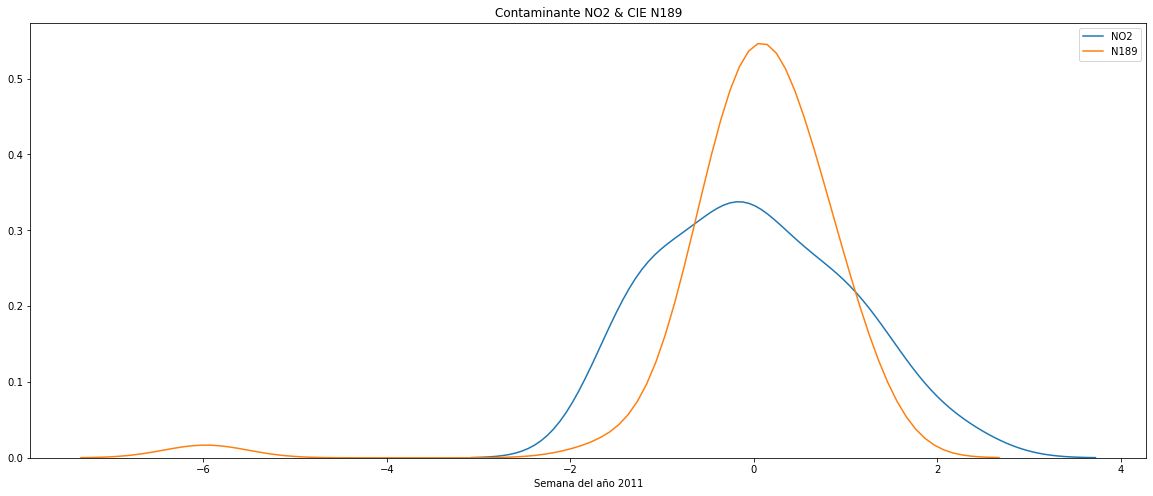


NO2 & N180


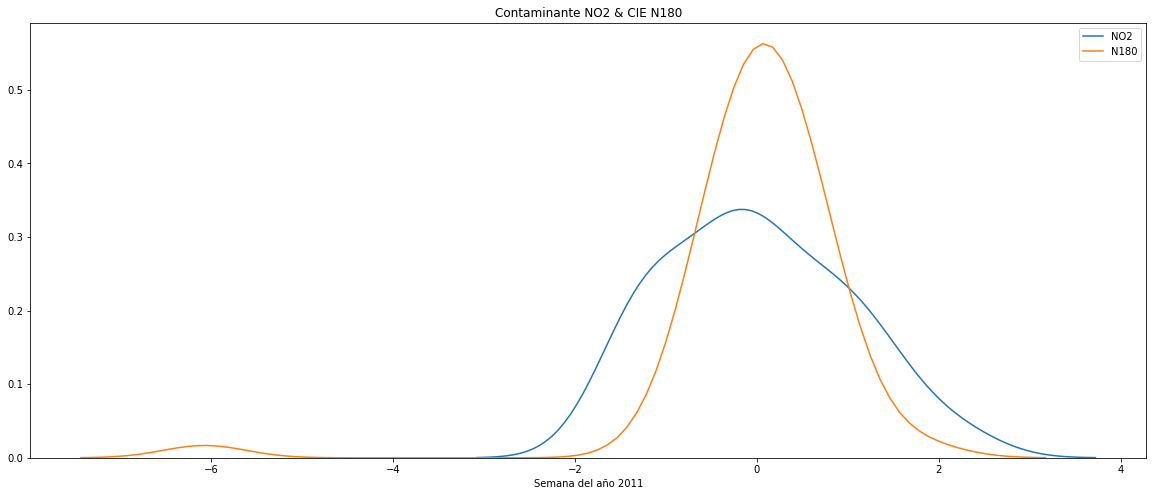


NO2 & H


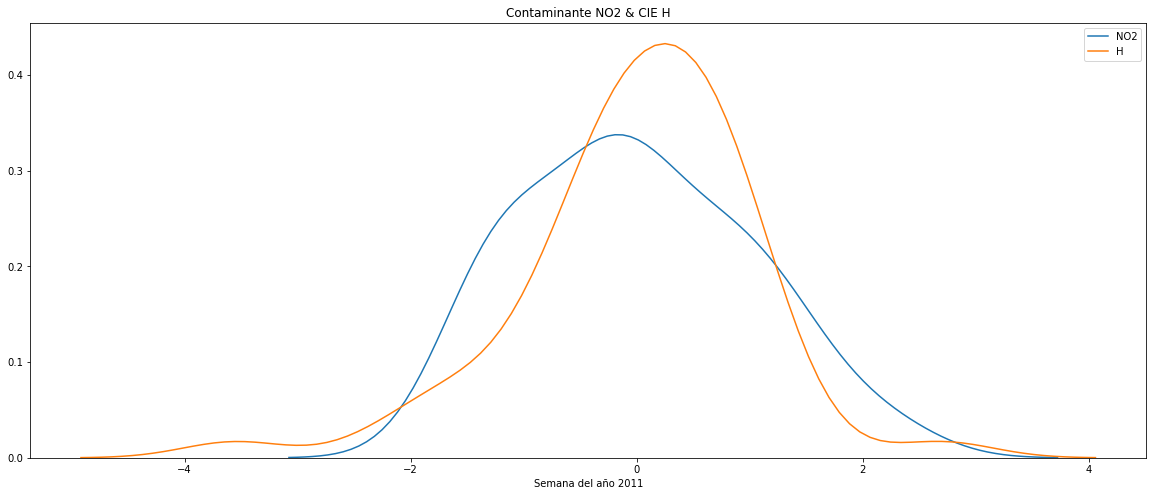


NO2 & I


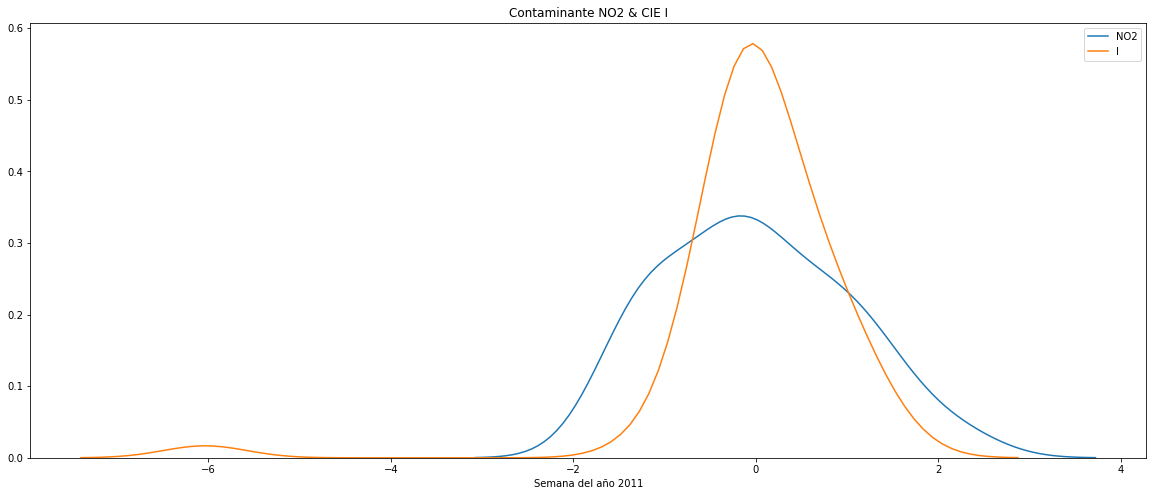


NO2 & J


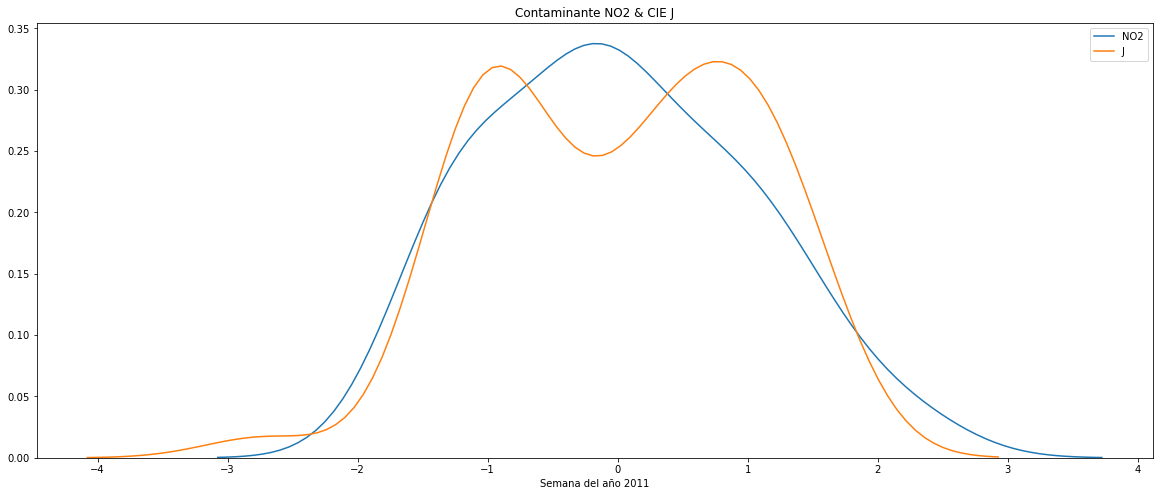

In [18]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2012)

In [19]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2012'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   NO2
0      2012-01-01 00  40.4
1      2012-01-01 00  60.6
2      2012-01-01 00  57.6
3      2012-01-01 00  57.8
4      2012-01-01 00  62.6
...              ...   ...
69702  2012-12-31 23  57.5
69703  2012-12-31 23  18.1
69704  2012-12-31 23  13.9
69705  2012-12-31 23  20.6
69706  2012-12-31 23  56.7

[69707 rows x 2 columns]

In [20]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   NO2
0     2012-01-01 00:00:00  40.4
1     2012-01-01 00:00:00  60.6
2     2012-01-01 00:00:00  57.6
3     2012-01-01 00:00:00  57.8
4     2012-01-01 00:00:00  62.6
...                   ...   ...
69702 2012-12-31 23:00:00  57.5
69703 2012-12-31 23:00:00  18.1
69704 2012-12-31 23:00:00  13.9
69705 2012-12-31 23:00:00  20.6
69706 2012-12-31 23:00:00  56.7

[69707 rows x 2 columns]

In [21]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   NO2  sem
0     2012-01-01 00:00:00  40.4    1
1     2012-01-01 00:00:00  60.6    1
2     2012-01-01 00:00:00  57.6    1
3     2012-01-01 00:00:00  57.8    1
4     2012-01-01 00:00:00  62.6    1
...                   ...   ...  ...
69702 2012-12-31 23:00:00  57.5    1
69703 2012-12-31 23:00:00  18.1    1
69704 2012-12-31 23:00:00  13.9    1
69705 2012-12-31 23:00:00  20.6    1
69706 2012-12-31 23:00:00  56.7    1

[69707 rows x 3 columns]

In [22]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        31/01/2012     N879
1        31/01/2012     O829
2        30/01/2012     O809
3        29/01/2012     O600
4        27/01/2012     O809
...             ...      ...
1048570  20/08/2012     C509
1048571  20/08/2012     C509
1048572  20/08/2012     C509
1048573  20/08/2012     C504
1048574  20/08/2012     C349

[1048553 rows x 2 columns]

In [23]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2012-01-31     N879    5
1       2012-01-31     O829    5
2       2012-01-30     O809    5
3       2012-01-29     O600    5
4       2012-01-27     O809    4
...            ...      ...  ...
1031354 2012-08-20     C509   34
1031355 2012-08-20     C509   34
1031356 2012-08-20     C509   34
1031357 2012-08-20     C504   34
1031358 2012-08-20     C349   34

[1031359 rows x 3 columns]

In [24]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     18779
2     21239
3     21814
4     21843
5     21599
6     20500
7     21971
8     21587
9     22496
10    22702
11    22764
12    21001
13    22828
14    20586
15    21345
16    22002
17    22369
18    21219
19    22078
20    22397
21    22780
22    22819
23    22913
24    22732
25    22251
26    19190
27    18462
28    18710
29    18718
30    18512
31    18944
32    18725
33    18393
34    18694
35    19395
36    19720
37    19381
38    18956
39    19045
40    18645
41    18980
42    18468
43    18446
44    17378
45    17753
46    18327
47    16771
48    18050
49    17672
50    17094
51    16777
52     5539
Name: sem, dtype: int64

In [25]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NO2
0     1  26.6095
1     2  25.2273
2     3  28.8837
3     4  21.1292
4     5  20.3002
5     6   16.858
6     7  19.3808
7     8  20.7699
8     9  17.8125
9    10  15.4119
10   11  15.1532
11   12  17.2041
12   13  13.9545
13   14  14.0926
14   15  9.51262
15   16  12.5368
16   17  16.5566
17   18  12.2062
18   19  13.1783
19   20  13.9402
20   21  14.5658
21   22  11.8411
22   23  13.5955
23   24  8.25521
24   25  9.33211
25   26  11.5958
26   27   8.8672
27   28   12.021
28   29  10.1749
29   30  11.0058
30   31  10.5449
31   32   9.9205
32   33  8.93036
33   34  10.7191
34   35  11.4256
35   36  10.5882
36   37  12.0746
37   38  17.2674
38   39   11.201
39   40  19.2667
40   41  11.6445
41   42  18.5031
42   43  13.5599
43   44  23.9541
44   45  18.1094
45   46   16.723
46   47  18.5236
47   48  23.7266
48   49  26.0501
49   50  24.0634
50   51  23.3532
51   52  23.2077


2012

NO2 & O809


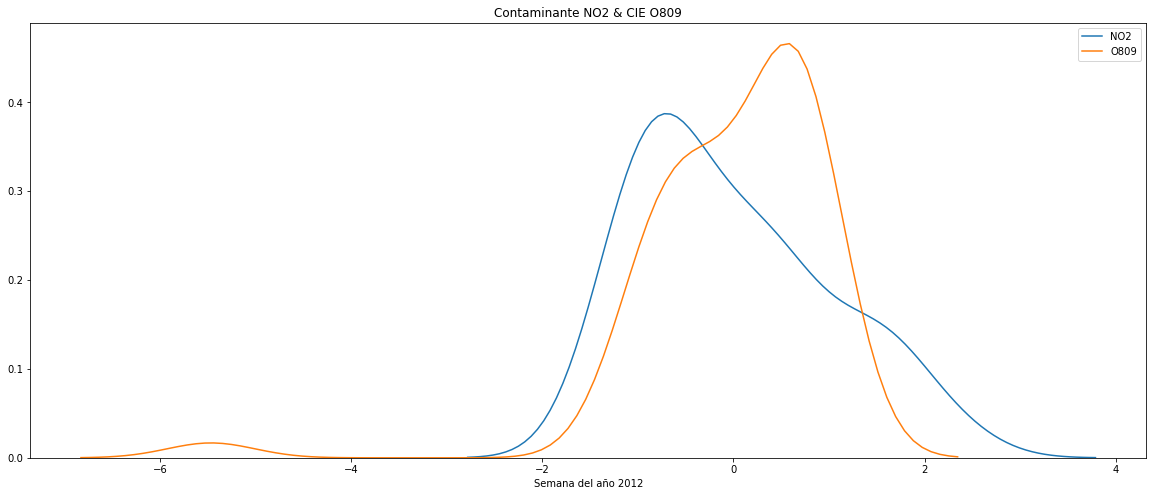


NO2 & O800


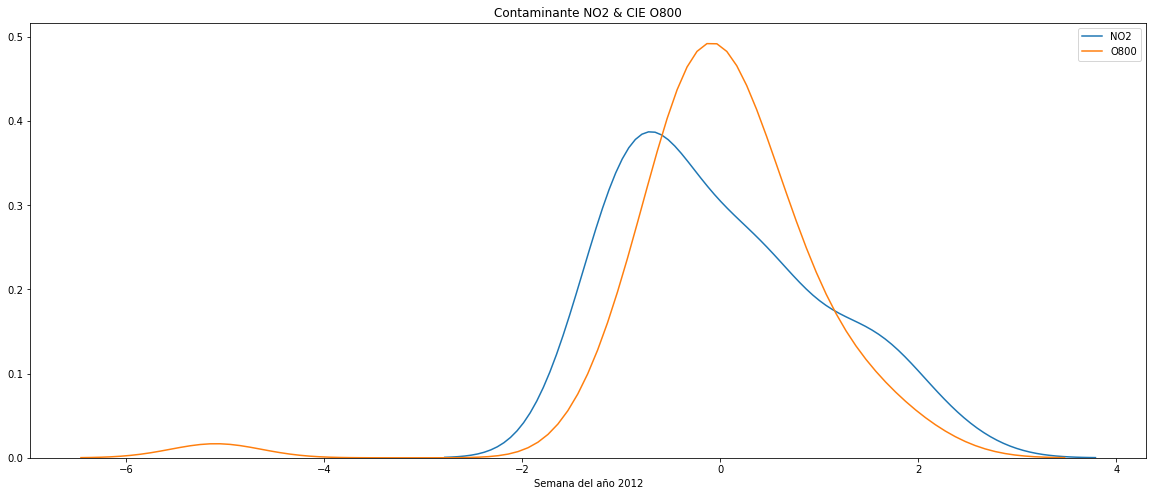


NO2 & O829


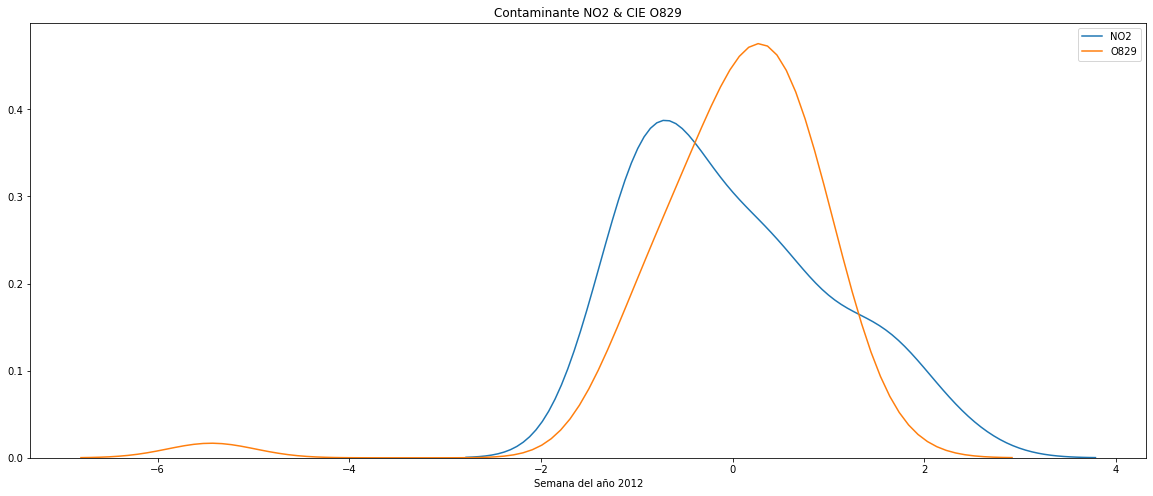


NO2 & O064


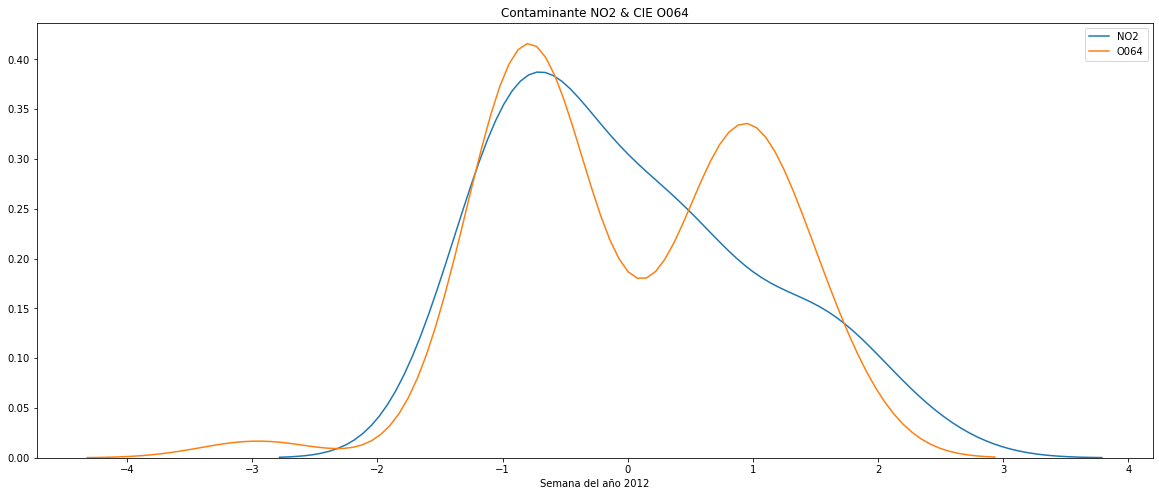


NO2 & N189


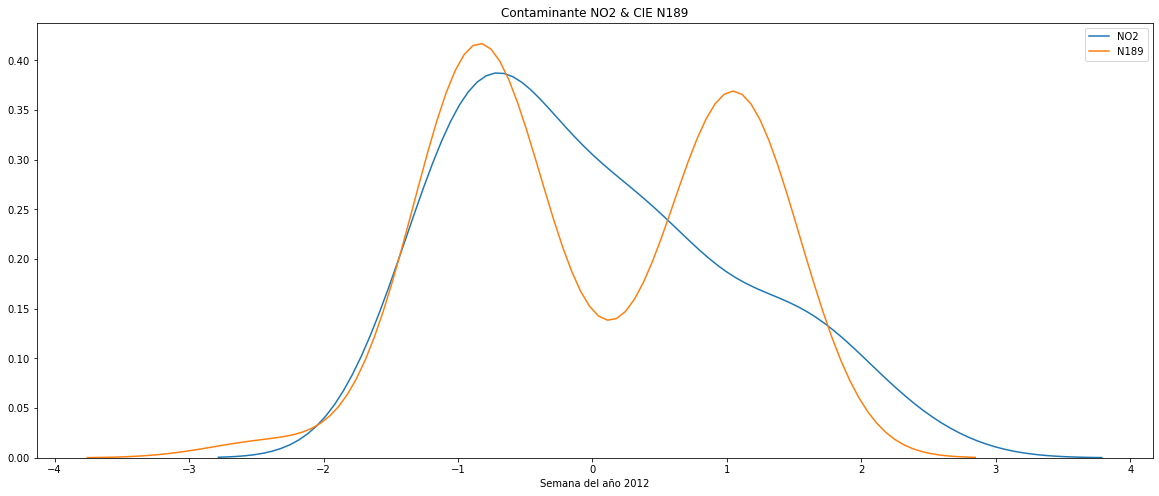


NO2 & O342


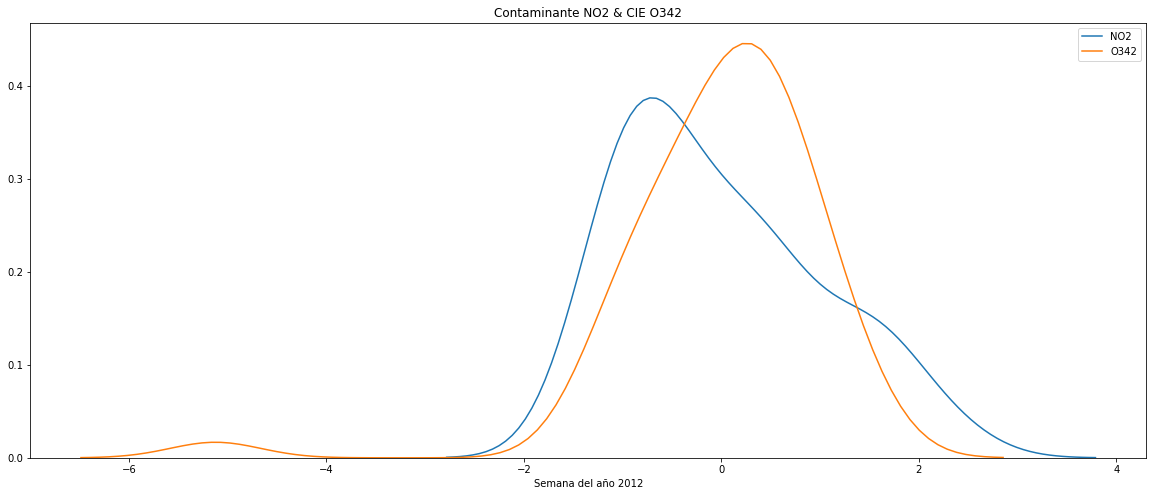


NO2 & K359


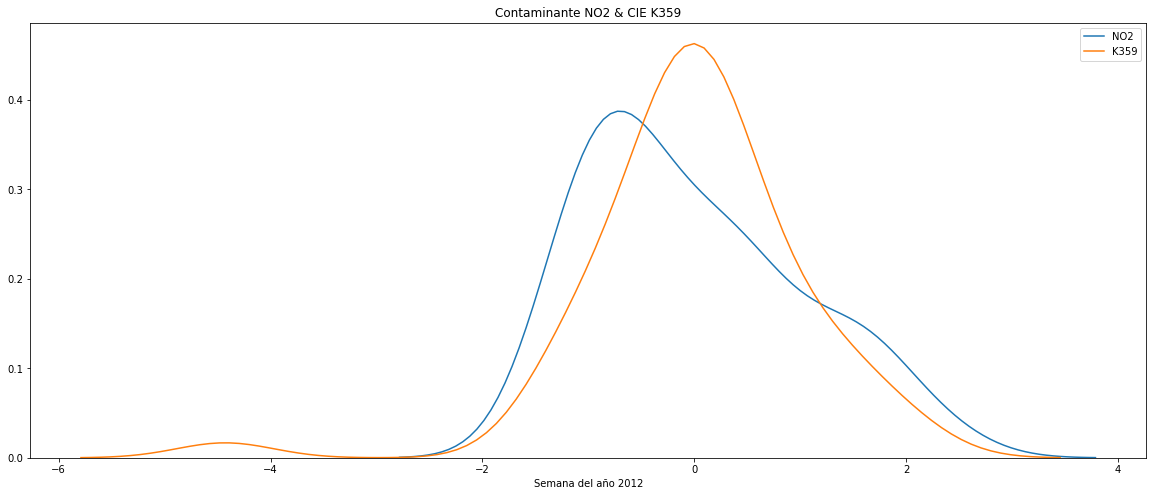


NO2 & H


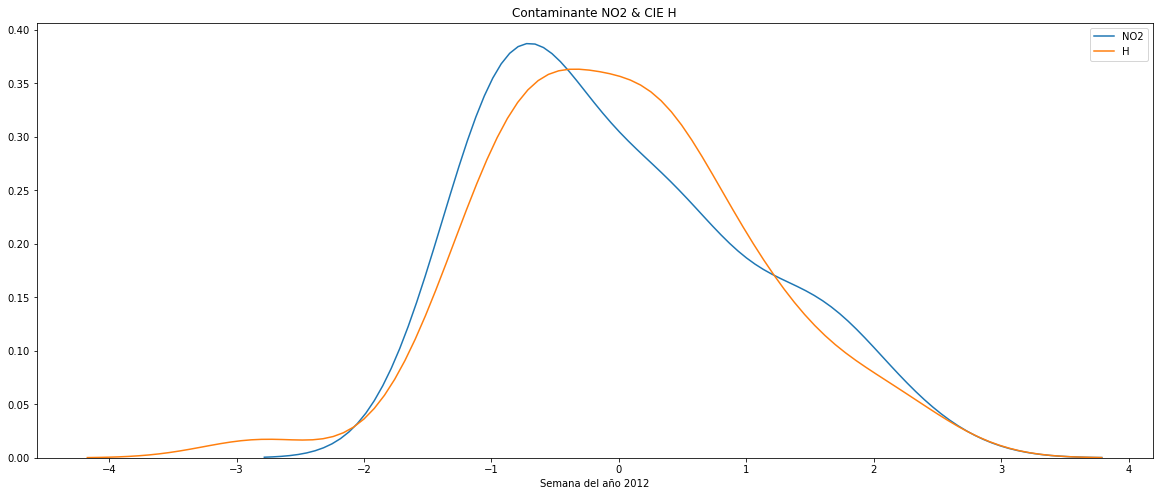


NO2 & I


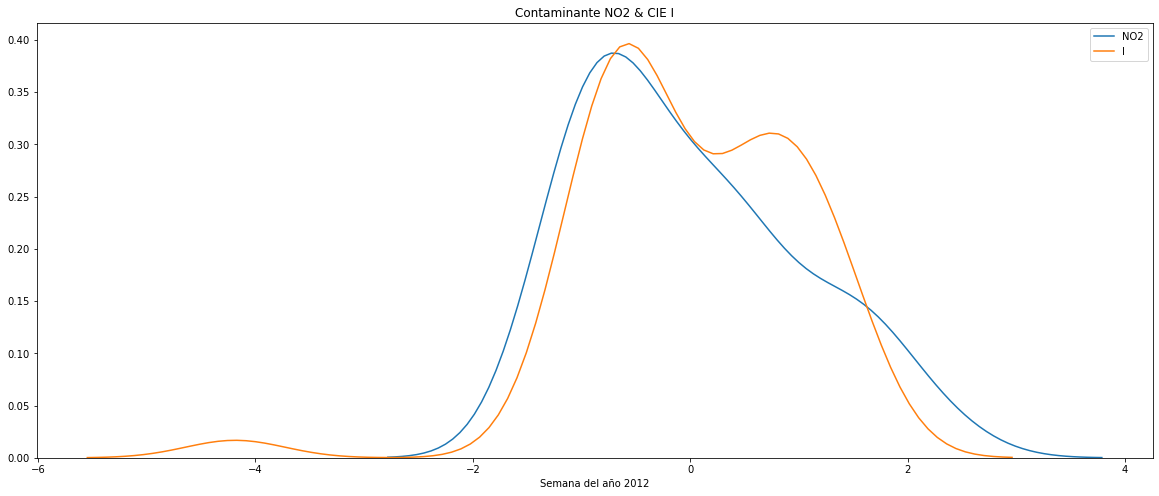


NO2 & J


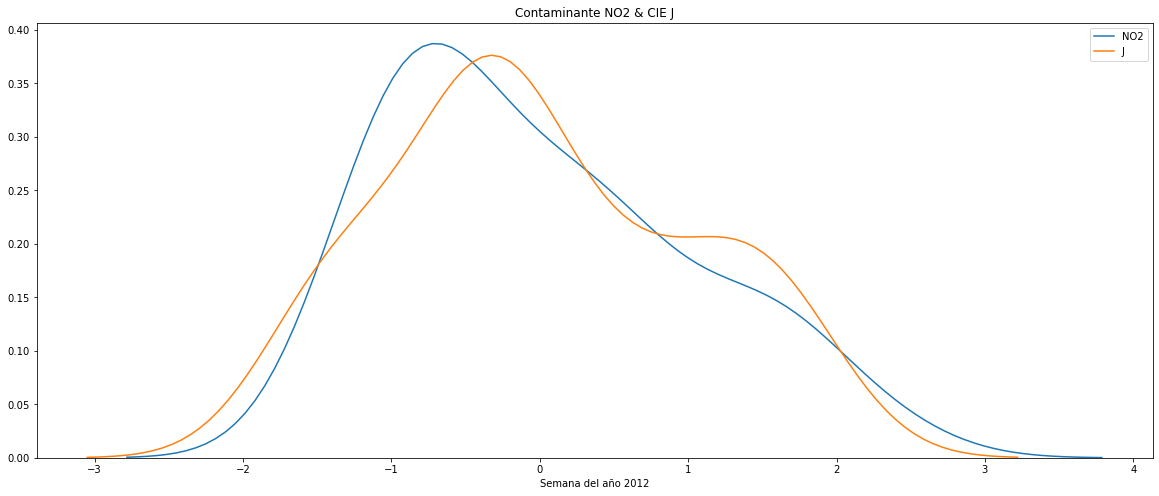

In [26]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2013)

In [27]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2013'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   NO2
0      2013-01-01 00  34.5
1      2013-01-01 00  46.4
2      2013-01-01 00  36.7
3      2013-01-01 00  42.6
4      2013-01-01 00  51.7
...              ...   ...
71403  2013-12-31 23  25.9
71404  2013-12-31 23  11.0
71405  2013-12-31 23   4.4
71406  2013-12-31 23  18.3
71407  2013-12-31 23  10.3

[71408 rows x 2 columns]

In [28]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   NO2
0     2013-01-01 00:00:00  34.5
1     2013-01-01 00:00:00  46.4
2     2013-01-01 00:00:00  36.7
3     2013-01-01 00:00:00  42.6
4     2013-01-01 00:00:00  51.7
...                   ...   ...
71403 2013-12-31 23:00:00  25.9
71404 2013-12-31 23:00:00  11.0
71405 2013-12-31 23:00:00   4.4
71406 2013-12-31 23:00:00  18.3
71407 2013-12-31 23:00:00  10.3

[71408 rows x 2 columns]

In [29]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   NO2  sem
0     2013-01-01 00:00:00  34.5    1
1     2013-01-01 00:00:00  46.4    1
2     2013-01-01 00:00:00  36.7    1
3     2013-01-01 00:00:00  42.6    1
4     2013-01-01 00:00:00  51.7    1
...                   ...   ...  ...
71403 2013-12-31 23:00:00  25.9    1
71404 2013-12-31 23:00:00  11.0    1
71405 2013-12-31 23:00:00   4.4    1
71406 2013-12-31 23:00:00  18.3    1
71407 2013-12-31 23:00:00  10.3    1

[71408 rows x 3 columns]

In [30]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        26/12/2012     O821
1        26/12/2012     O010
2        26/12/2012     O821
3        26/12/2012     O809
4        26/12/2012     O620
...             ...      ...
2879308  04/08/2013     E145
2879309  03/08/2013     J459
2879310  04/08/2013     S720
2879311  05/07/2013     D443
2879312  26/08/2013     N189

[2879313 rows x 2 columns]

In [31]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%d/%m/%Y'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2013-02-27     N189    9
1       2013-02-27     N189    9
2       2013-02-27     D24X    9
3       2013-02-27     D259    9
4       2013-02-27     H269    9
...            ...      ...  ...
2838186 2013-08-04     E145   32
2838187 2013-08-03     J459   31
2838188 2013-08-04     S720   32
2838189 2013-07-05     D443   27
2838190 2013-08-26     N189   35

[2838191 rows x 3 columns]

In [32]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     30917
2     51944
3     54767
4     55143
5     56515
6     53178
7     56002
8     55853
9     55571
10    56491
11    56657
12    53958
13    51466
14    52506
15    54445
16    55322
17    55199
18    51481
19    54249
20    54902
21    56010
22    55427
23    55435
24    55423
25    54589
26    54972
27    54102
28    55326
29    54767
30    55215
31    55467
32    56402
33    57405
34    57124
35    58985
36    58378
37    59142
38    55204
39    59186
40    59148
41    59384
42    58773
43    57475
44    56153
45    57378
46    57442
47    53195
48    56061
49    55459
50    54729
51    53190
52    24679
Name: sem, dtype: int64

In [33]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NO2
0     1  14.7781
1     2  26.4002
2     3   17.168
3     4  22.2946
4     5  20.0444
5     6  17.8981
6     7  17.6349
7     8  17.6853
8     9  17.9013
9    10  21.0193
10   11  17.8003
11   12  19.1985
12   13  12.5958
13   14  14.3861
14   15  14.7446
15   16  13.8629
16   17  14.7139
17   18  14.7728
18   19  12.9354
19   20   17.688
20   21   14.133
21   22  10.0297
22   23  10.5172
23   24  10.3408
24   25  7.83598
25   26  8.74588
26   27  11.2432
27   28  8.40061
28   29  7.72551
29   30  9.18852
30   31  8.25923
31   32   9.5192
32   33  9.91615
33   34  10.8135
34   35  9.35921
35   36  9.90878
36   37  10.7918
37   38  8.04401
38   39  13.7951
39   40  10.9875
40   41  14.8016
41   42  10.2374
42   43  15.3307
43   44  15.5968
44   45  19.3504
45   46  20.7576
46   47  13.4627
47   48  15.4909
48   49   20.107
49   50  18.6653
50   51  22.6609
51   52  14.9189


2013

NO2 & O809


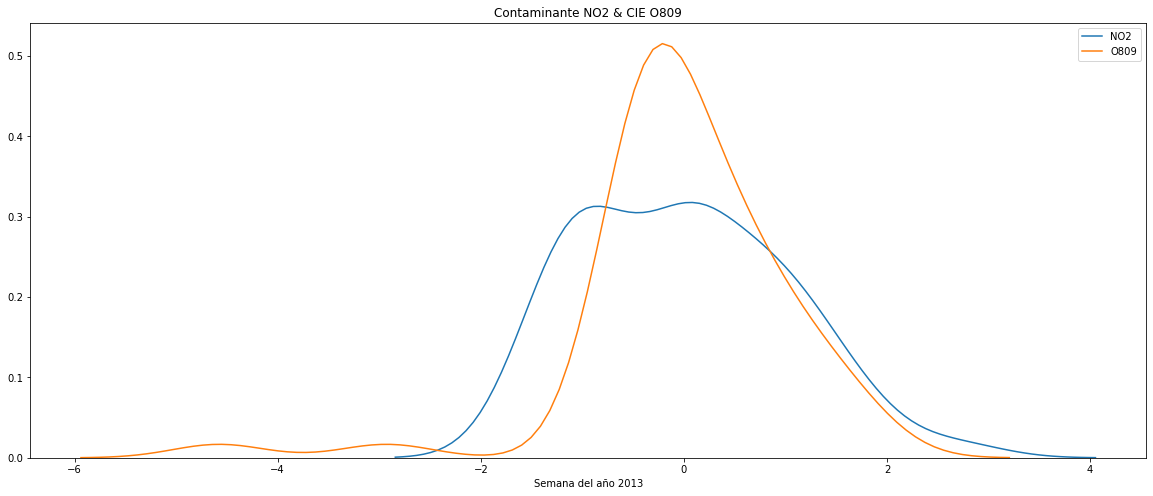


NO2 & O800


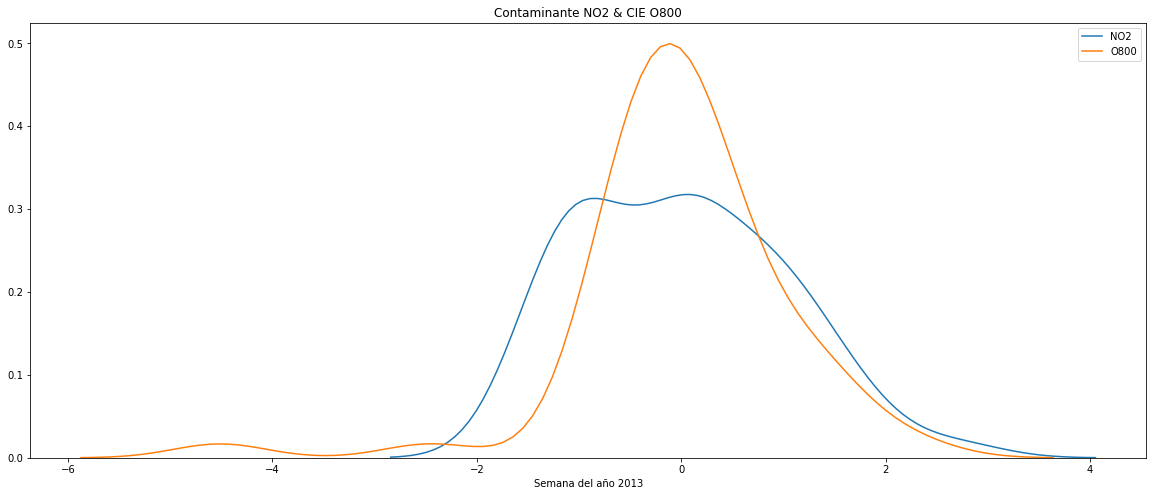


NO2 & O829


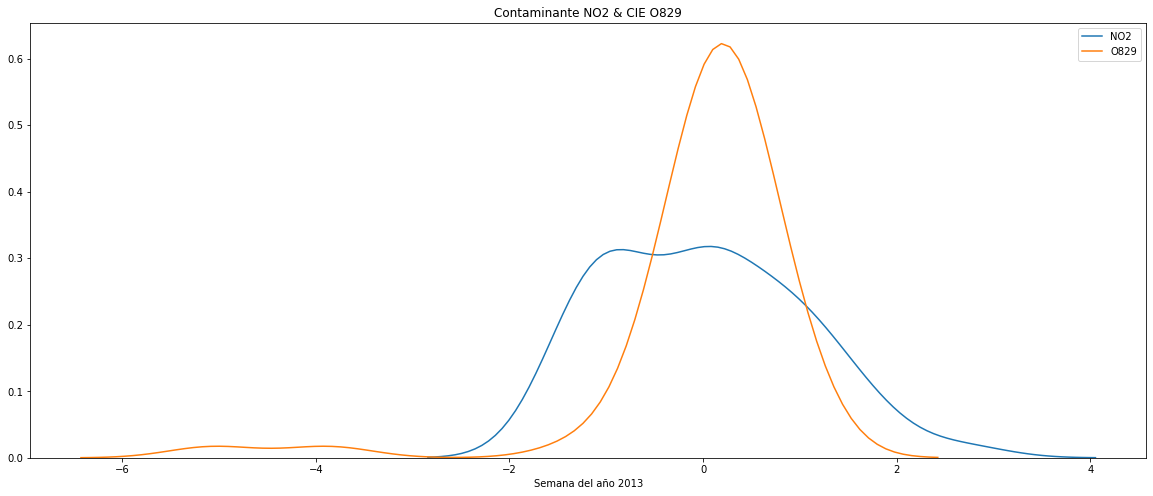


NO2 & N189


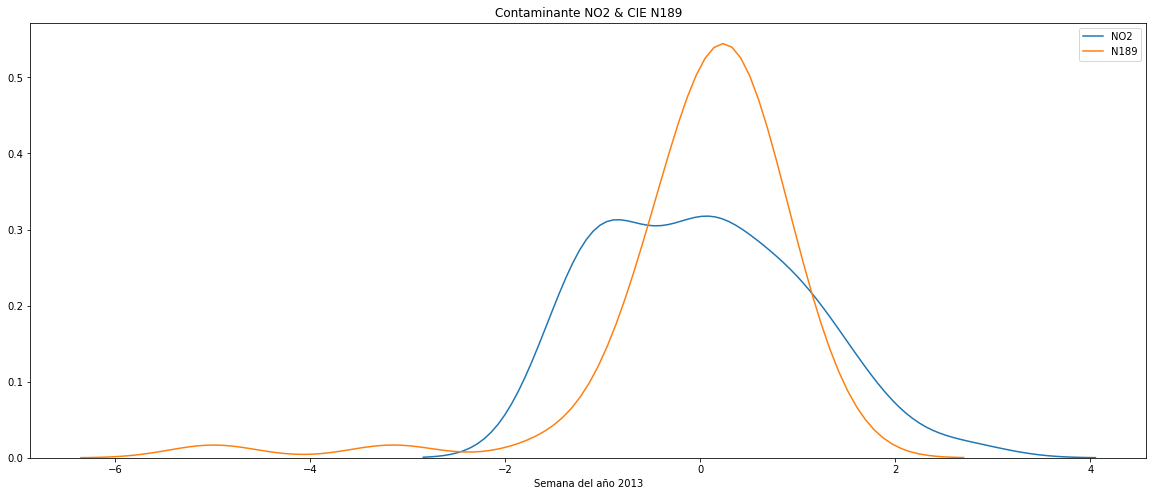


NO2 & O064


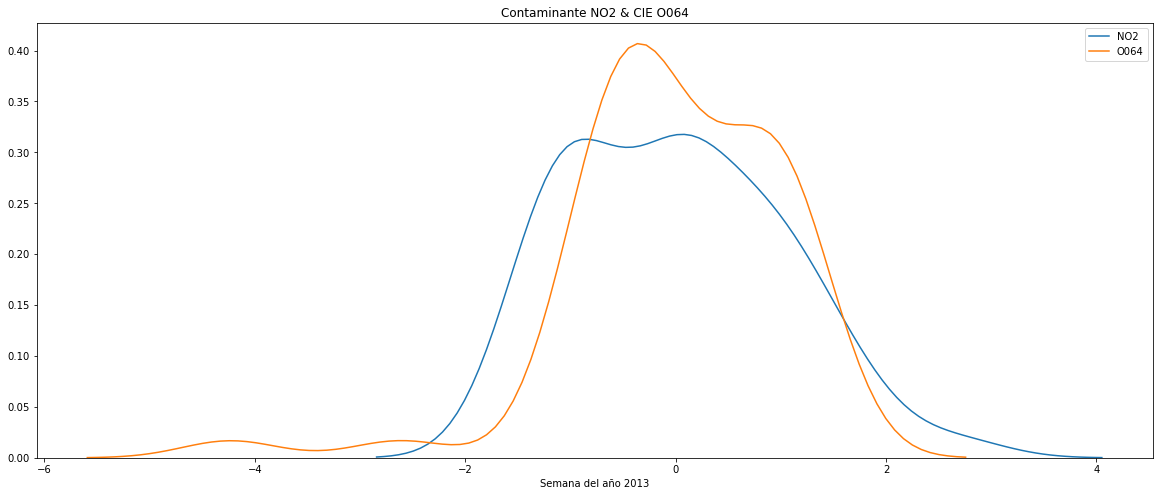


NO2 & O342


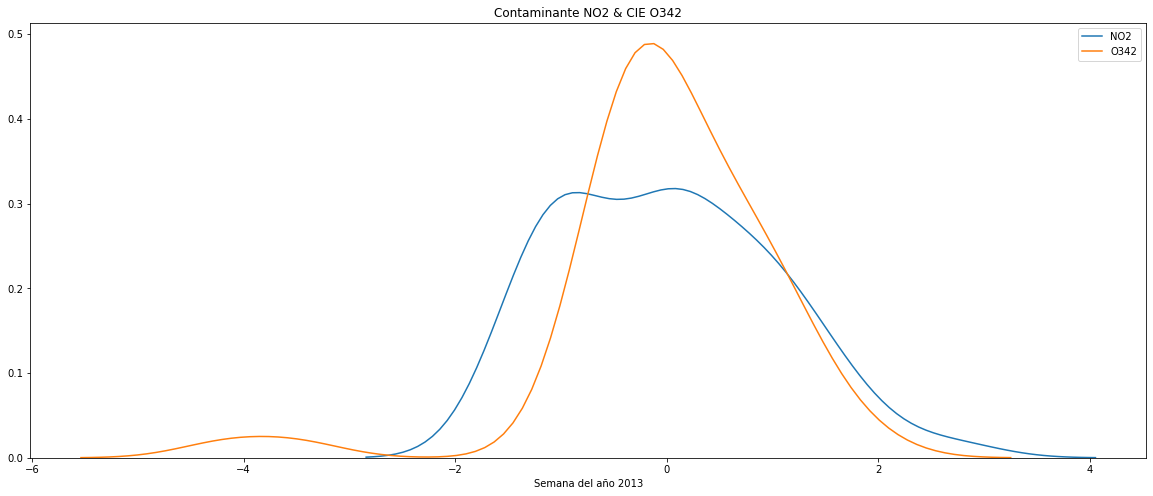


NO2 & K359


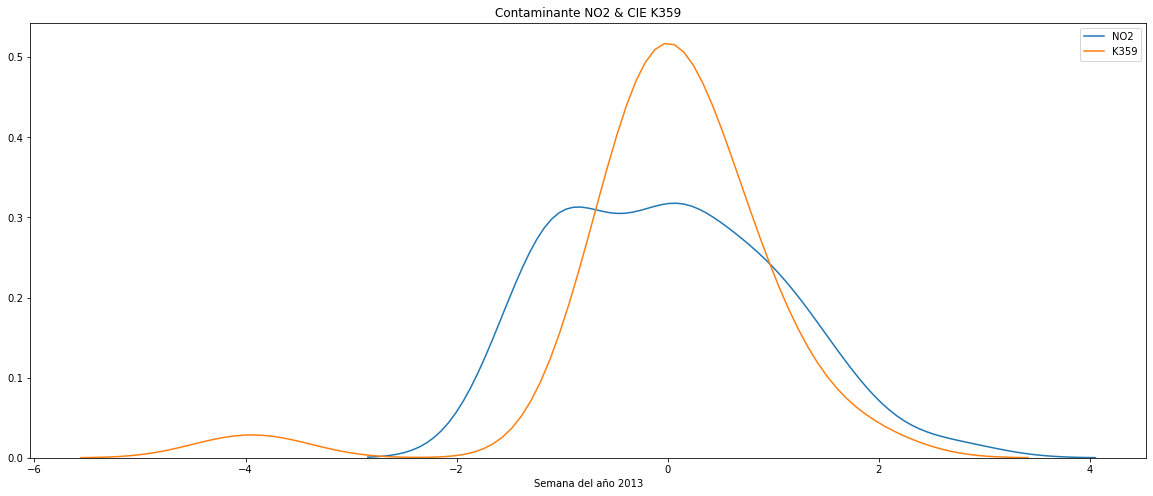


NO2 & H


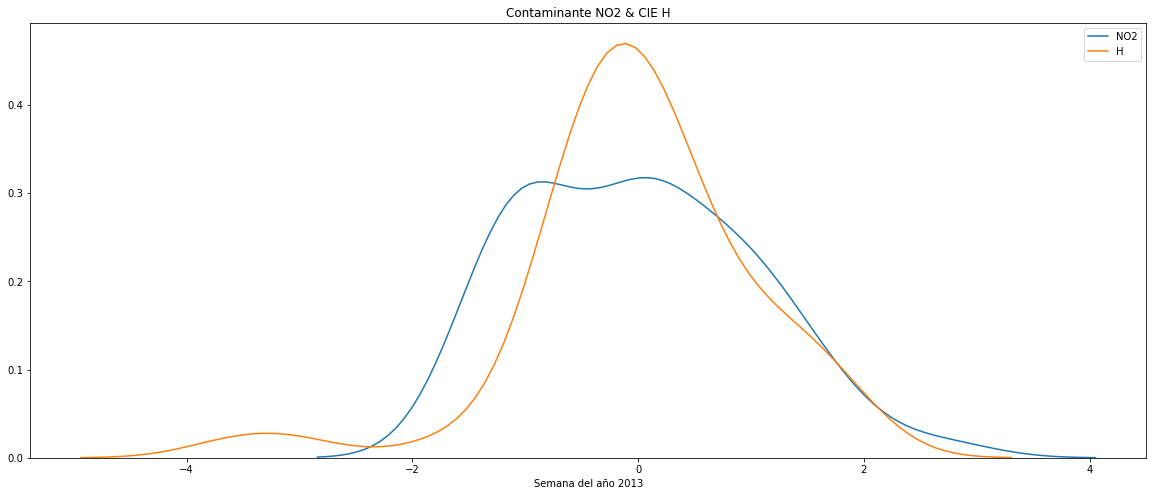


NO2 & I


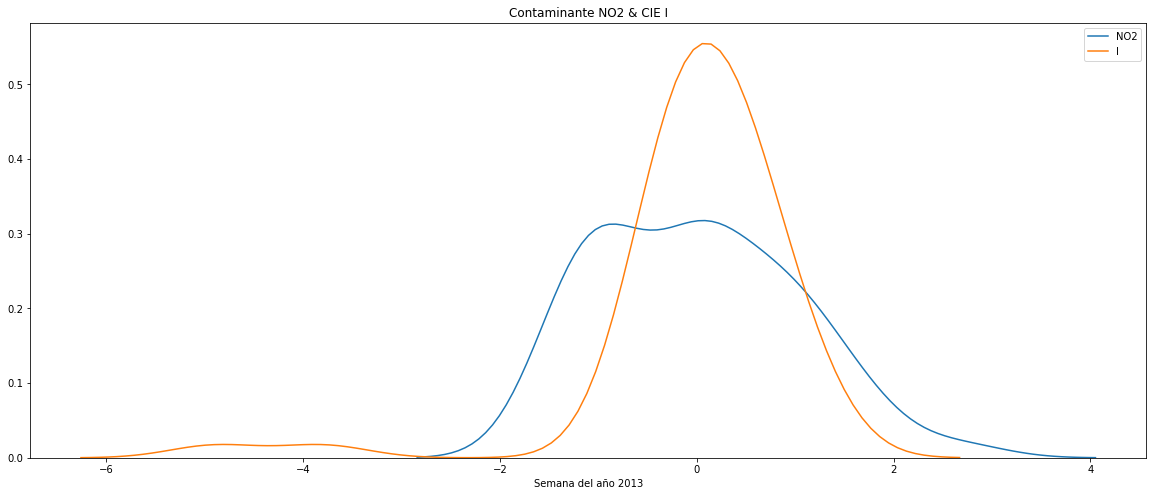


NO2 & J


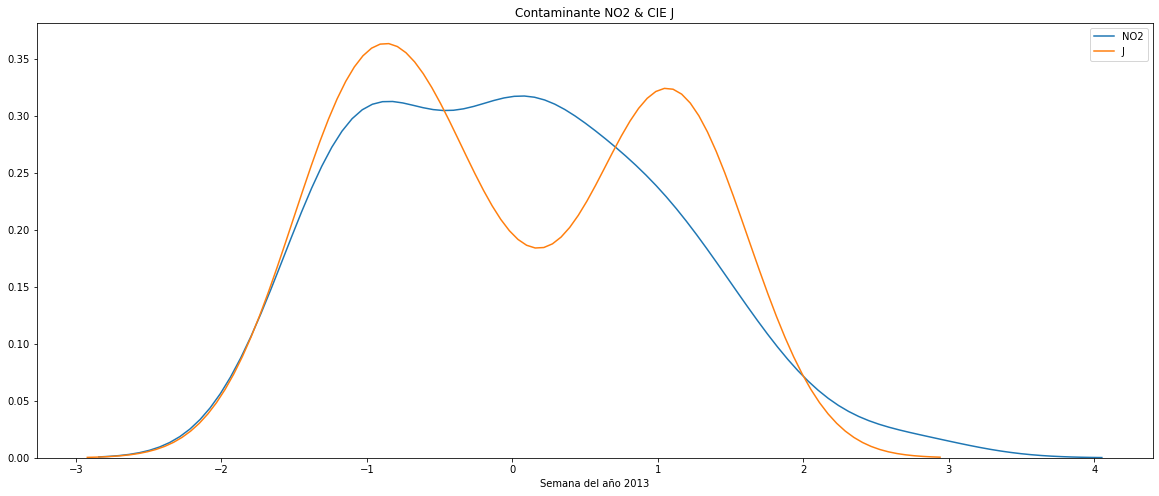

In [34]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2014)

In [35]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2014'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   NO2
0      2014-01-01 00   9.7
1      2014-01-01 00  24.6
2      2014-01-01 00  32.8
3      2014-01-01 00  27.4
4      2014-01-01 00  10.1
...              ...   ...
52298  2014-12-31 23   9.0
52299  2014-12-31 23   4.3
52300  2014-12-31 23   4.3
52301  2014-12-31 23   5.9
52302  2014-12-31 23   5.9

[52303 rows x 2 columns]

In [36]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   NO2
0     2014-01-01 00:00:00   9.7
1     2014-01-01 00:00:00  24.6
2     2014-01-01 00:00:00  32.8
3     2014-01-01 00:00:00  27.4
4     2014-01-01 00:00:00  10.1
...                   ...   ...
52298 2014-12-31 23:00:00   9.0
52299 2014-12-31 23:00:00   4.3
52300 2014-12-31 23:00:00   4.3
52301 2014-12-31 23:00:00   5.9
52302 2014-12-31 23:00:00   5.9

[52303 rows x 2 columns]

In [37]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   NO2  sem
0     2014-01-01 00:00:00   9.7    1
1     2014-01-01 00:00:00  24.6    1
2     2014-01-01 00:00:00  32.8    1
3     2014-01-01 00:00:00  27.4    1
4     2014-01-01 00:00:00  10.1    1
...                   ...   ...  ...
52298 2014-12-31 23:00:00   9.0   53
52299 2014-12-31 23:00:00   4.3   53
52300 2014-12-31 23:00:00   4.3   53
52301 2014-12-31 23:00:00   5.9   53
52302 2014-12-31 23:00:00   5.9   53

[52303 rows x 3 columns]

In [38]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        2014-11-20 00:00:00     P220
1        2014-09-17 00:00:00     O829
2        2014-09-10 00:00:00     O809
3        2014-09-05 00:00:00     O689
4        2014-09-04 00:00:00     O809
...                      ...      ...
2959192  2014-10-02 00:00:00     O649
2959193  2014-11-18 00:00:00     O809
2959194  2014-12-19 00:00:00     O470
2959195  2014-01-14 00:00:00     O809
2959196  2014-02-17 00:00:00     I10X

[2959197 rows x 2 columns]

In [39]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2014-11-20     P220   47
1       2014-09-17     O829   38
2       2014-09-10     O809   37
3       2014-09-05     O689   36
4       2014-09-04     O809   36
...            ...      ...  ...
2918661 2014-10-02     O649   40
2918662 2014-11-18     O809   47
2918663 2014-12-19     O470   51
2918664 2014-01-14     O809    3
2918665 2014-02-17     I10X    8

[2918666 rows x 3 columns]

In [40]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     23312
2     51774
3     55426
4     55220
5     57112
6     53354
7     55606
8     56075
9     56113
10    56754
11    57918
12    54352
13    58534
14    57541
15    57472
16    51809
17    53967
18    53470
19    52428
20    56835
21    56361
22    58079
23    58118
24    57917
25    57070
26    57280
27    56855
28    57669
29    58157
30    57816
31    57907
32    57712
33    57097
34    57984
35    60024
36    60197
37    61139
38    56277
39    60859
40    61418
41    61557
42    59699
43    58636
44    59131
45    57958
46    59866
47    54846
48    59227
49    57866
50    57841
51    56454
52    34577
Name: sem, dtype: int64

In [41]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NO2
0     1  20.1889
1     2  22.0175
2     3  25.9661
3     4  23.8667
4     5  25.2377
5     6  18.9392
6     7  24.7441
7     8  20.0816
8     9  16.8931
9    10  13.5433
10   11  15.1739
11   12  14.0329
12   13  12.2134
13   14   8.9277
14   15  12.3814
15   16  8.71737
16   17  11.2233
17   18  13.1746
18   19  13.7848
19   20  11.7529
20   21  7.08913
21   22  8.86183
22   23  5.73477
23   24  7.51948
24   25  8.62998
25   26  7.84141
26   27  6.31136
27   28  7.47536
28   29  7.67447
29   30  9.44076
30   31  8.30997
31   32  10.3197
32   33  9.64745
33   34  8.39866
34   35   8.5406
35   36  8.29029
36   37  9.00861
37   38  9.84314
38   39  11.2804
39   40  14.3888
40   41  14.7417
41   42  18.7016
42   43  14.4349
43   44  12.7701
44   45  12.5876
45   46  16.7985
46   47  19.2815
47   48  23.8049
48   49  18.1453
49   50  14.4451
50   51  14.7213
51   52  18.2392


2014

NO2 & O809


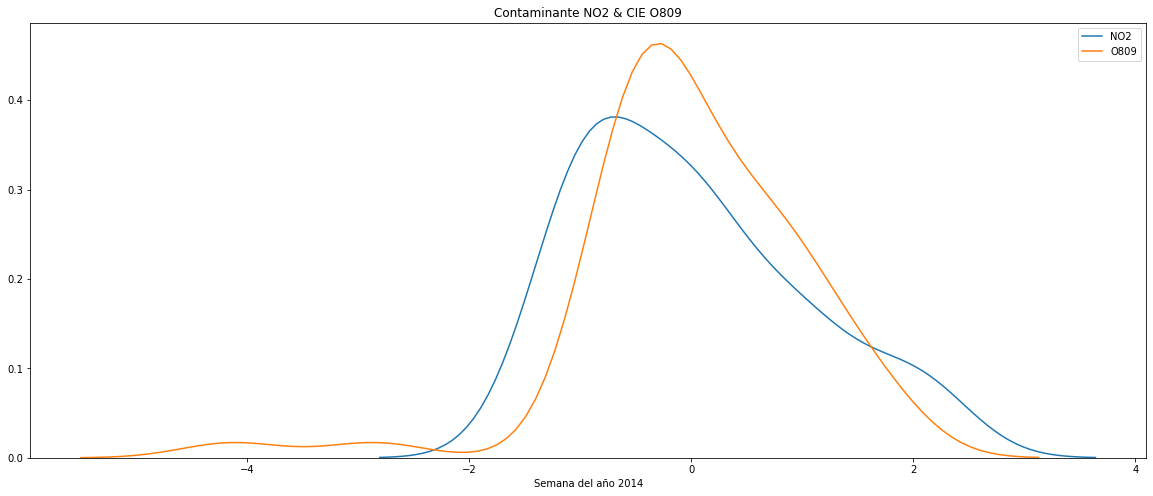


NO2 & O800


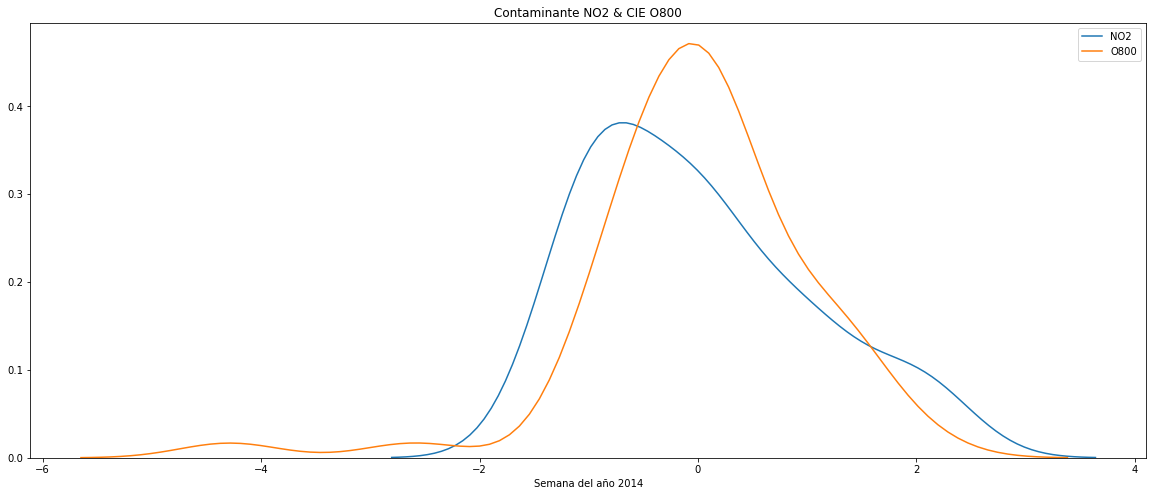


NO2 & N189


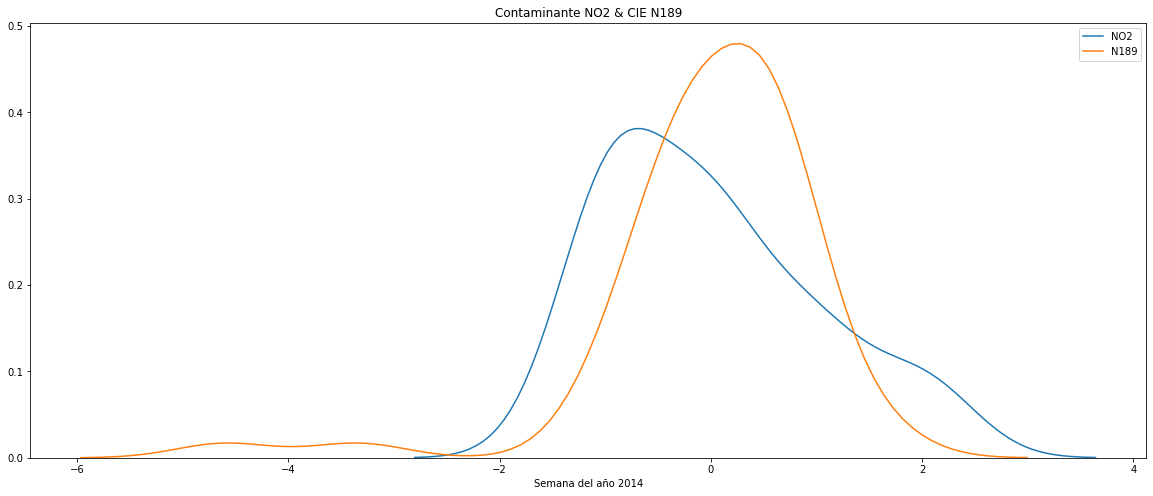


NO2 & O829


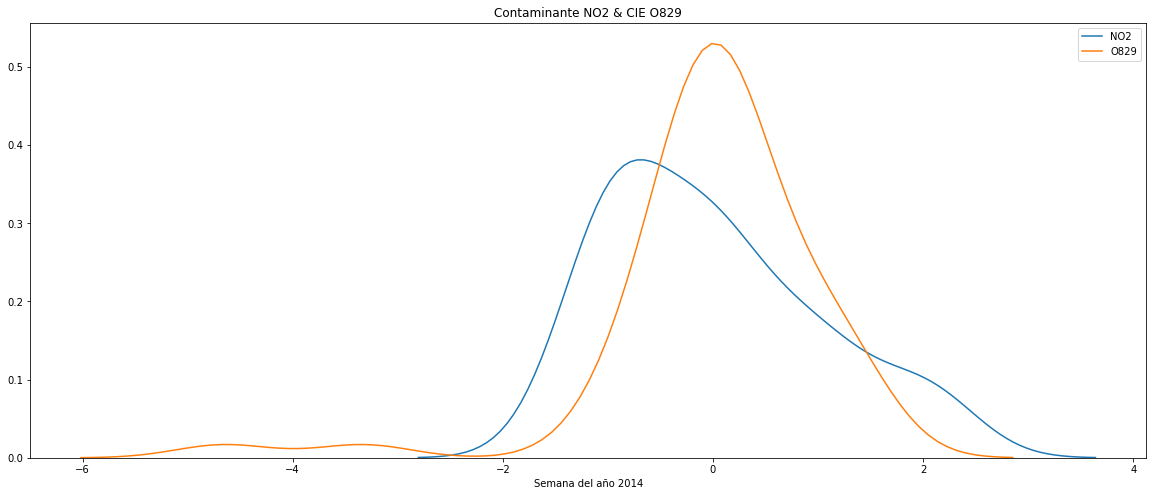


NO2 & O064


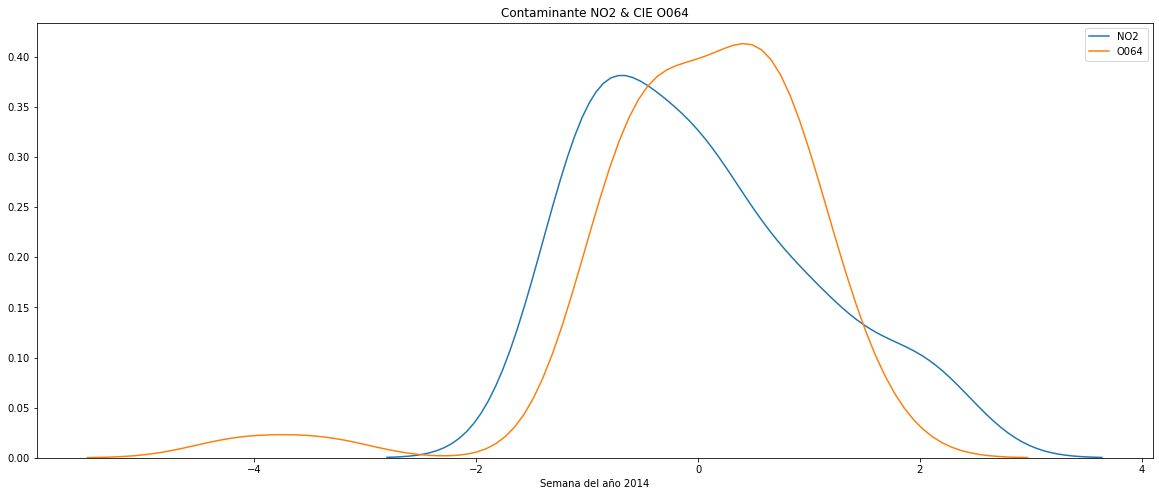


NO2 & O342


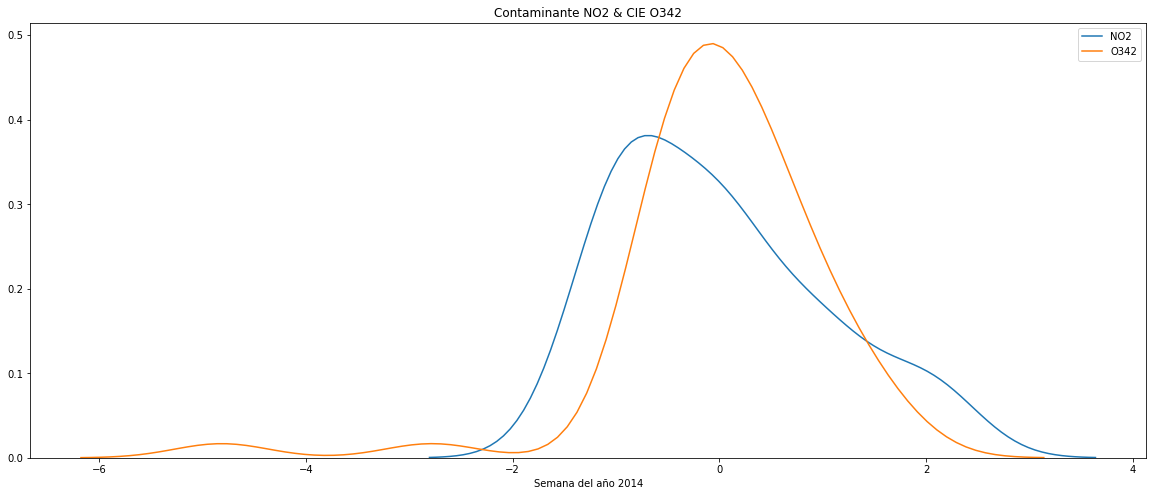


NO2 & N185


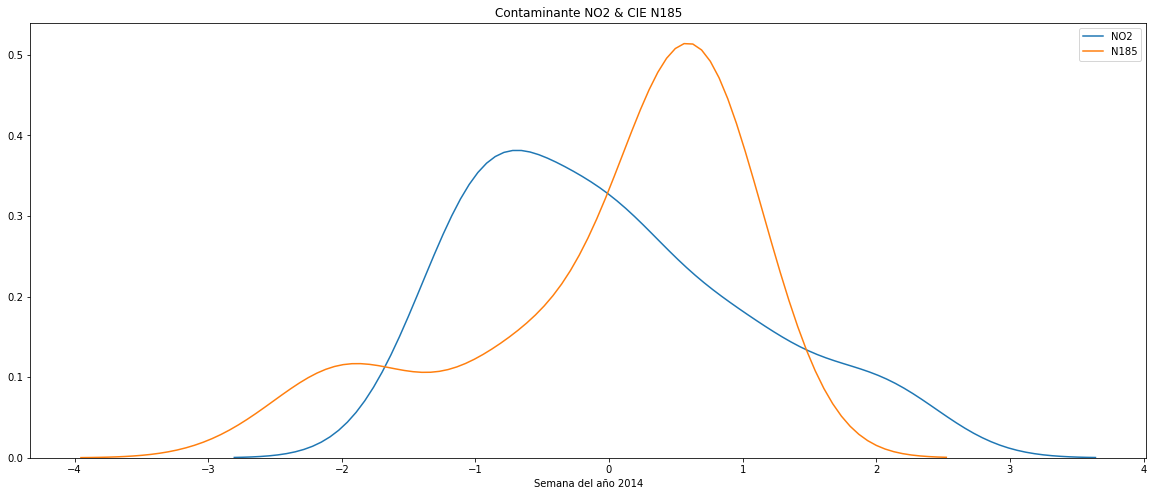


NO2 & H


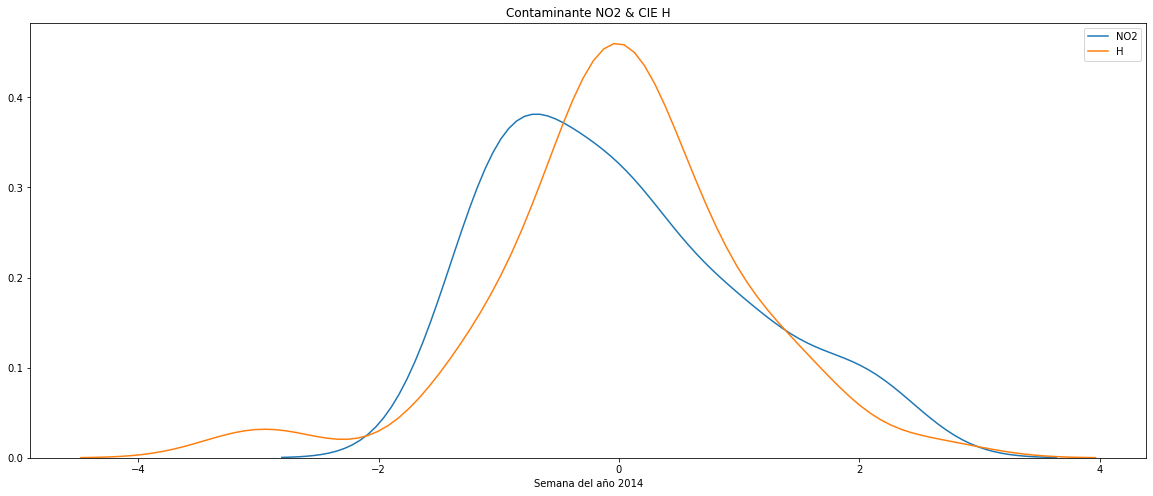


NO2 & I


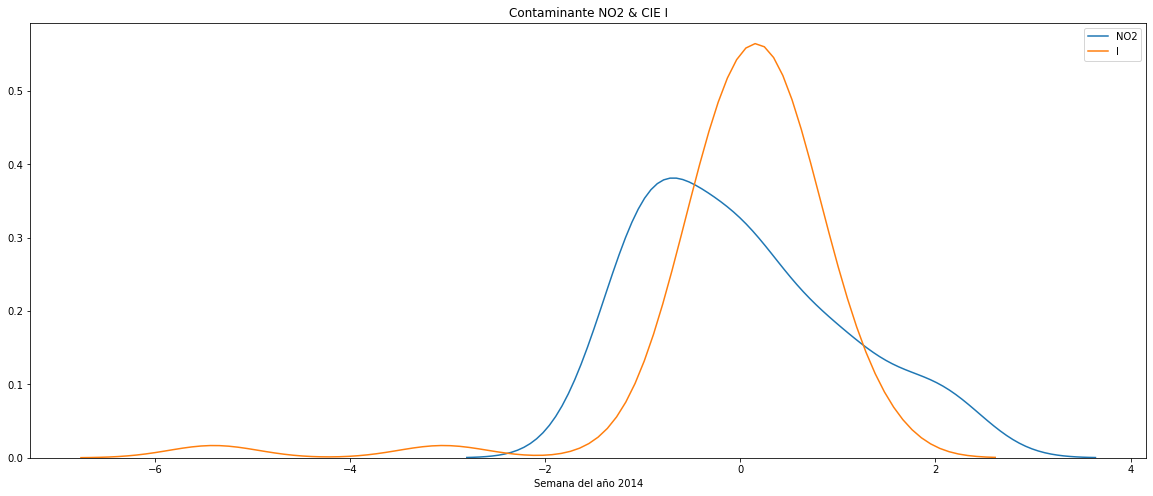


NO2 & J


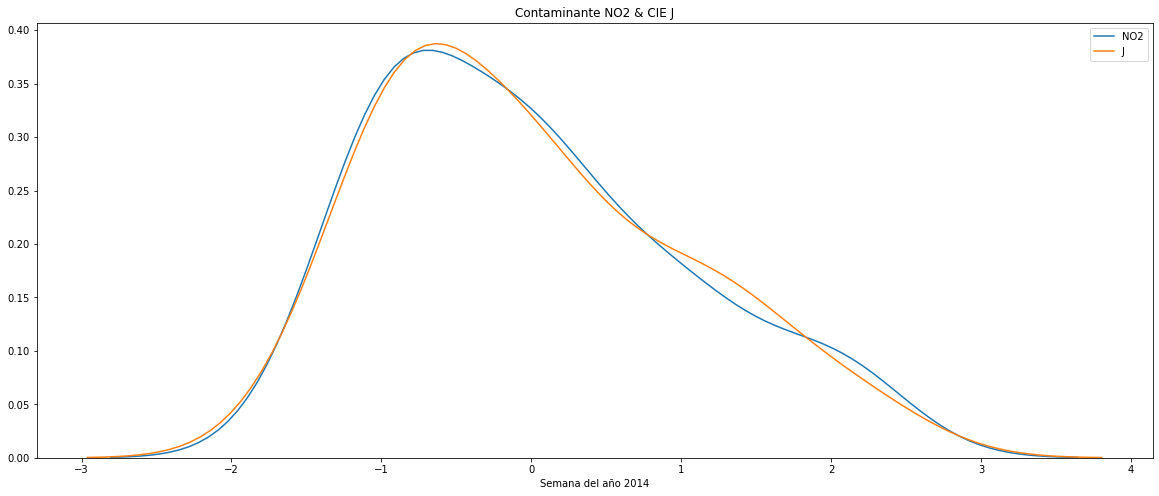

In [42]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2015)

In [43]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2015'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   NO2
0      2015-01-01 00  13.1
1      2015-01-01 00   8.0
2      2015-01-01 00   4.2
3      2015-01-01 00   3.7
4      2015-01-01 00   4.5
...              ...   ...
44482  2015-12-31 23   1.6
44483  2015-12-31 23   8.6
44484  2015-12-31 23   7.9
44485  2015-12-31 23   8.2
44486  2015-12-31 23  10.0

[44487 rows x 2 columns]

In [44]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   NO2
0     2015-01-01 00:00:00  13.1
1     2015-01-01 00:00:00   8.0
2     2015-01-01 00:00:00   4.2
3     2015-01-01 00:00:00   3.7
4     2015-01-01 00:00:00   4.5
...                   ...   ...
44482 2015-12-31 23:00:00   1.6
44483 2015-12-31 23:00:00   8.6
44484 2015-12-31 23:00:00   7.9
44485 2015-12-31 23:00:00   8.2
44486 2015-12-31 23:00:00  10.0

[44487 rows x 2 columns]

In [45]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   NO2  sem
0     2015-01-01 00:00:00  13.1   53
1     2015-01-01 00:00:00   8.0   53
2     2015-01-01 00:00:00   4.2   53
3     2015-01-01 00:00:00   3.7   53
4     2015-01-01 00:00:00   4.5   53
...                   ...   ...  ...
44482 2015-12-31 23:00:00   1.6   52
44483 2015-12-31 23:00:00   8.6   52
44484 2015-12-31 23:00:00   7.9   52
44485 2015-12-31 23:00:00   8.2   52
44486 2015-12-31 23:00:00  10.0   52

[44487 rows x 3 columns]

In [46]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums, nrows=2500000).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        2015-01-03 00:00:00     C910
1        2015-01-03 00:00:00     C845
2        2015-01-03 00:00:00     C189
3        2015-01-03 00:00:00     C509
4        2015-01-03 00:00:00     C220
...                      ...      ...
2499995  2015-02-09 00:00:00     O410
2499996  2015-03-12 00:00:00     K811
2499997  2015-04-08 00:00:00     O809
2499998  2015-05-10 00:00:00     O054
2499999  2015-06-10 00:00:00     P240

[2500000 rows x 2 columns]

In [47]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2015-01-03     C910   53
1       2015-01-03     C845   53
2       2015-01-03     C189   53
3       2015-01-03     C509   53
4       2015-01-03     C220   53
...            ...      ...  ...
2463488 2015-02-09     O410    6
2463489 2015-03-12     K811   10
2463490 2015-04-08     O809   14
2463491 2015-05-10     O054   19
2463492 2015-06-10     P240   23

[2463493 rows x 3 columns]

In [48]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     44314
2     47507
3     48330
4     49381
5     46542
6     49035
7     48313
8     49213
9     48990
10    49905
11    46079
12    49712
13    44580
14    46364
15    47680
16    48058
17    47197
18    44426
19    47733
20    48187
21    48794
22    48484
23    48844
24    47430
25    46821
26    48245
27    49058
28    48403
29    48423
30    49374
31    49081
32    49114
33    49120
34    49473
35    49948
36    50555
37    46763
38    50028
39    50709
40    51615
41    49976
42    48570
43    49416
44    46316
45    49821
46    45952
47    49110
48    49021
49    47650
50    46348
51    35336
53    14149
Name: sem, dtype: int64

In [49]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NO2
0     1  14.5218
1     2  16.6357
2     3  17.8806
3     4  18.4363
4     5  15.1936
5     6  16.6507
6     7  15.7857
7     8  12.5046
8     9  11.3997
9    10  14.9387
10   11   12.349
11   12  11.1402
12   13  9.09726
13   14  9.09633
14   15  11.4226
15   16   11.866
16   17  11.0623
17   18  8.38982
18   19  7.63397
19   20  7.16498
20   21  5.96466
21   22  4.97568
22   23   4.5344
23   24   6.2144
24   25  5.12763
25   26  5.77045
26   27   5.0462
27   28  5.21845
28   29  5.59211
29   30  5.53365
30   31  5.39857
31   32  5.96346
32   33  7.79194
33   34  6.25893
34   35  6.14075
35   36    7.954
36   37  7.38109
37   38  8.65704
38   39  12.2797
39   40  9.68101
40   41  11.8505
41   42  9.67077
42   43  14.4185
43   44  11.4595
44   45   11.012
45   46  11.5653
46   47  9.43953
47   48  10.8816
48   49  17.4183
49   50  14.1681
50   51   17.089
51   53   9.7642


2015

NO2 & O809


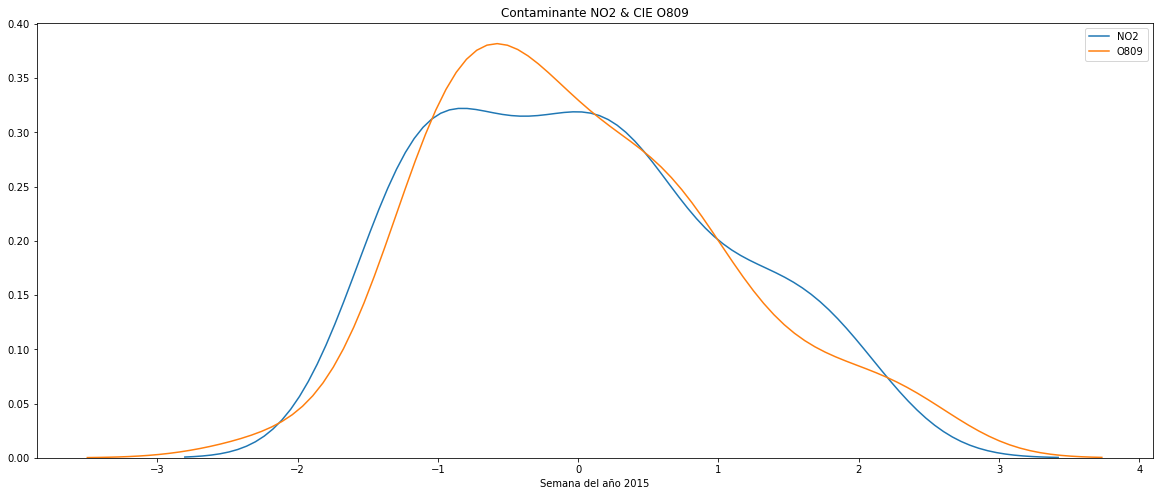


NO2 & N189


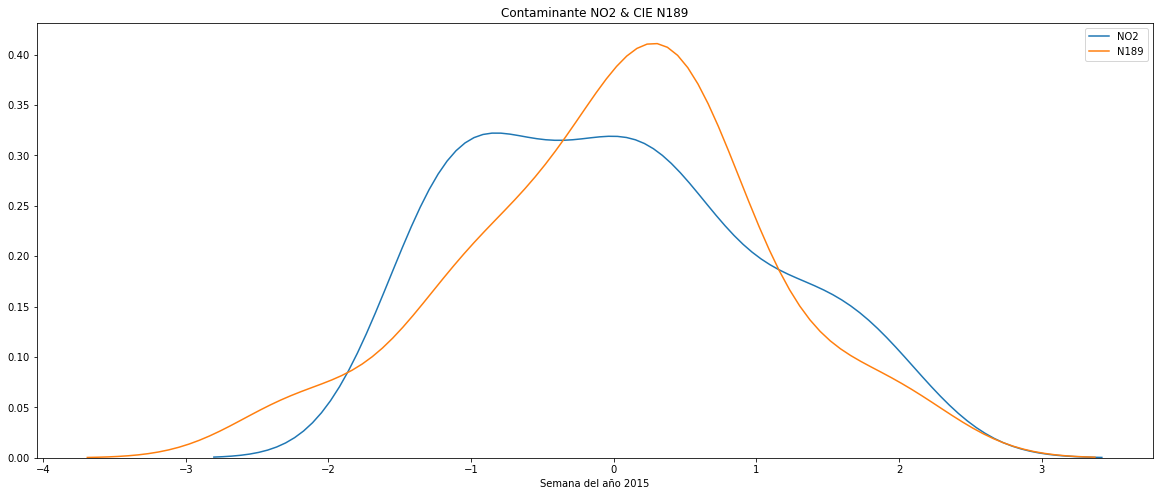


NO2 & O800


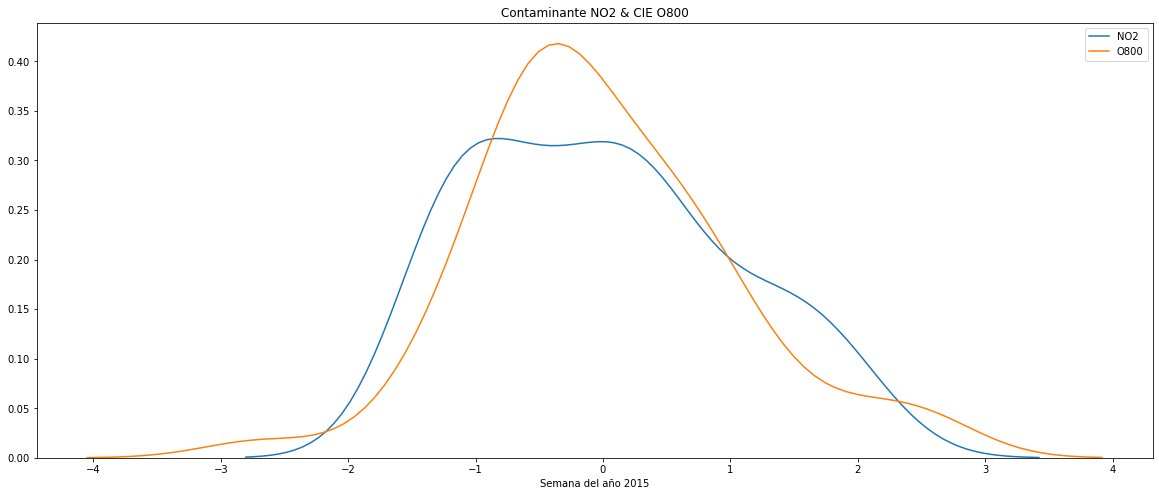


NO2 & O829


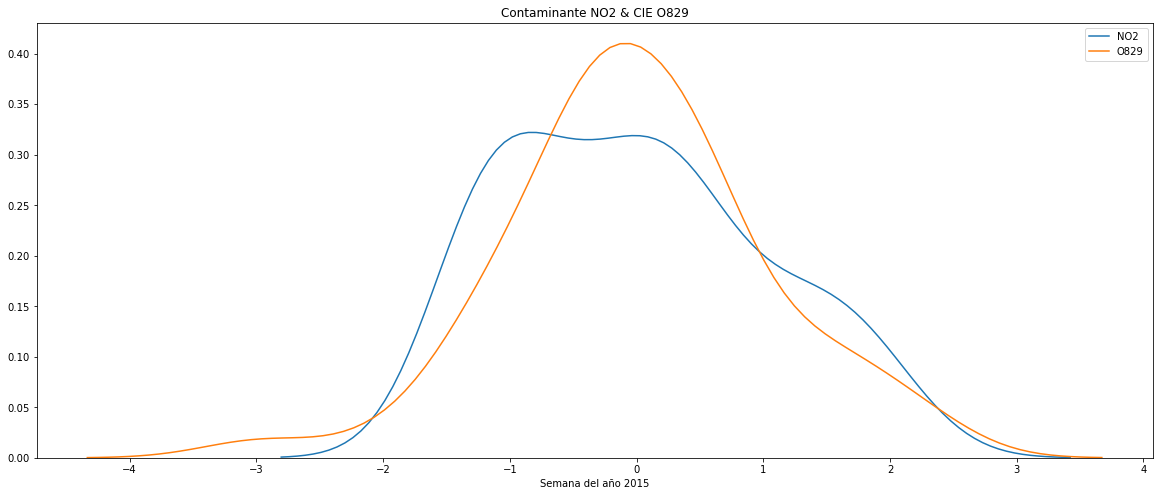


NO2 & O064


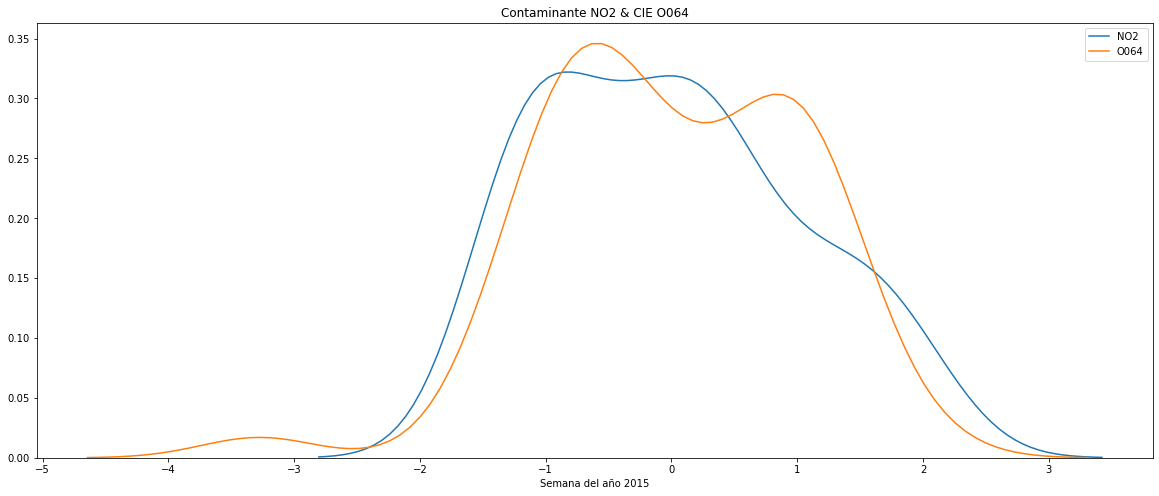


NO2 & O342


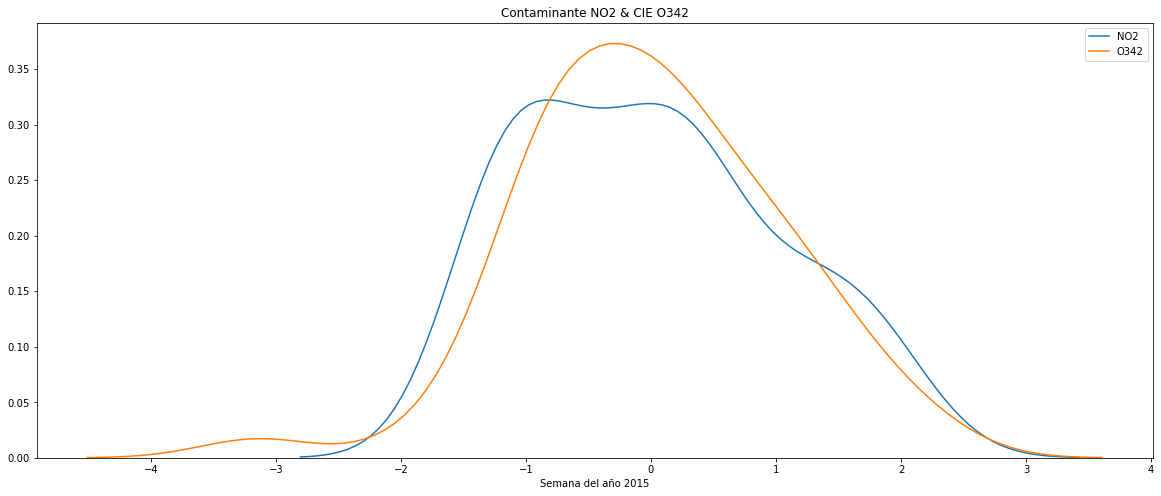


NO2 & K358


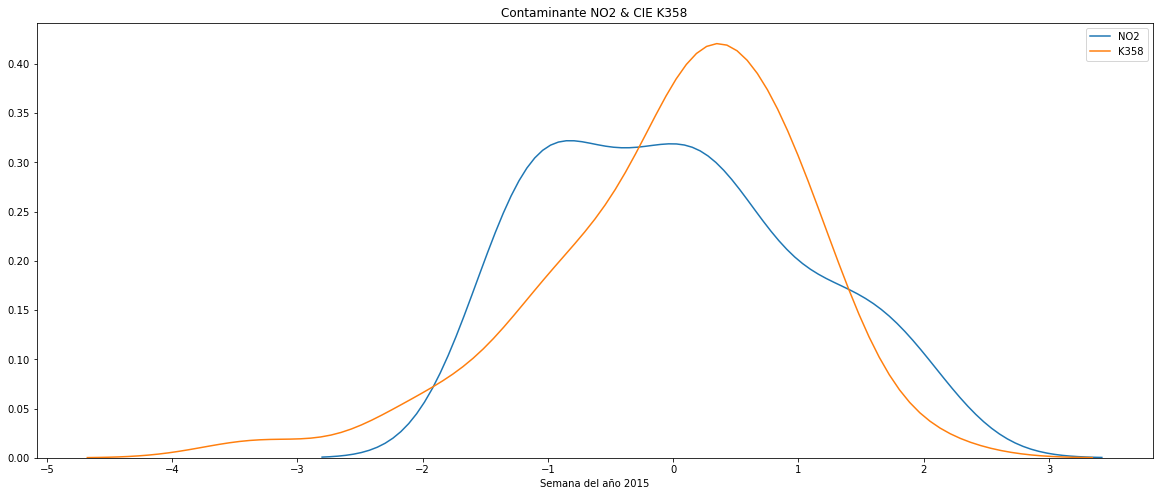


NO2 & H


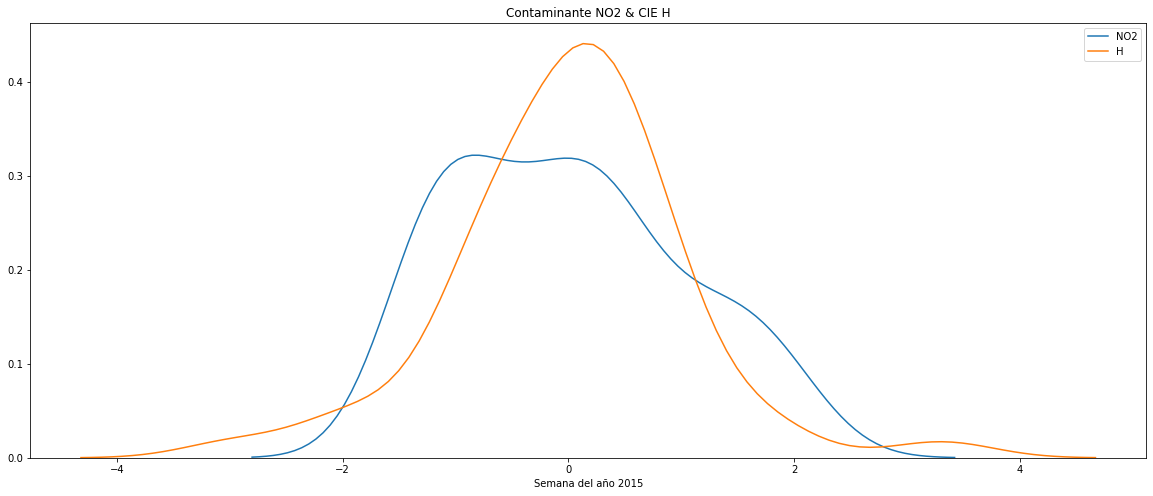


NO2 & I


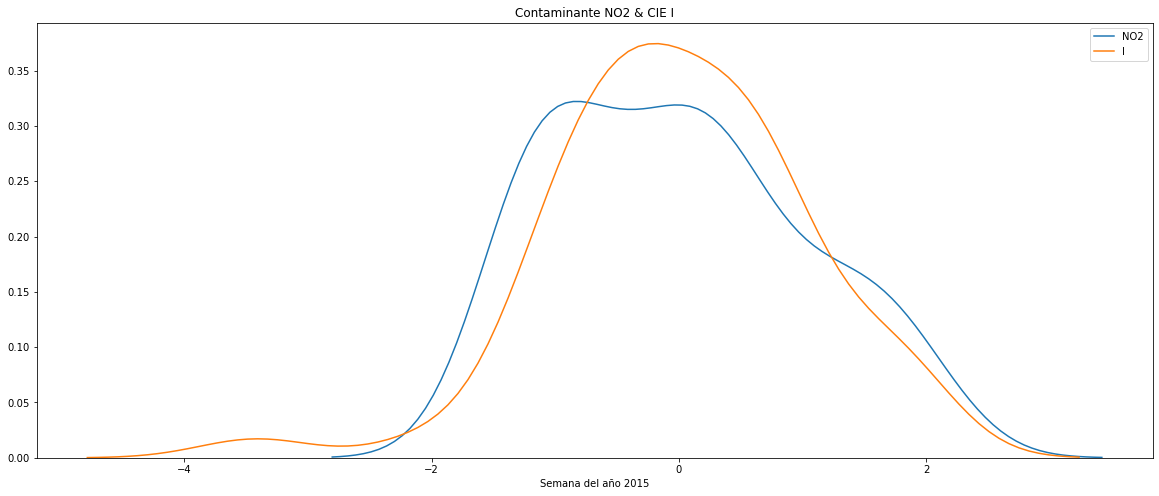


NO2 & J


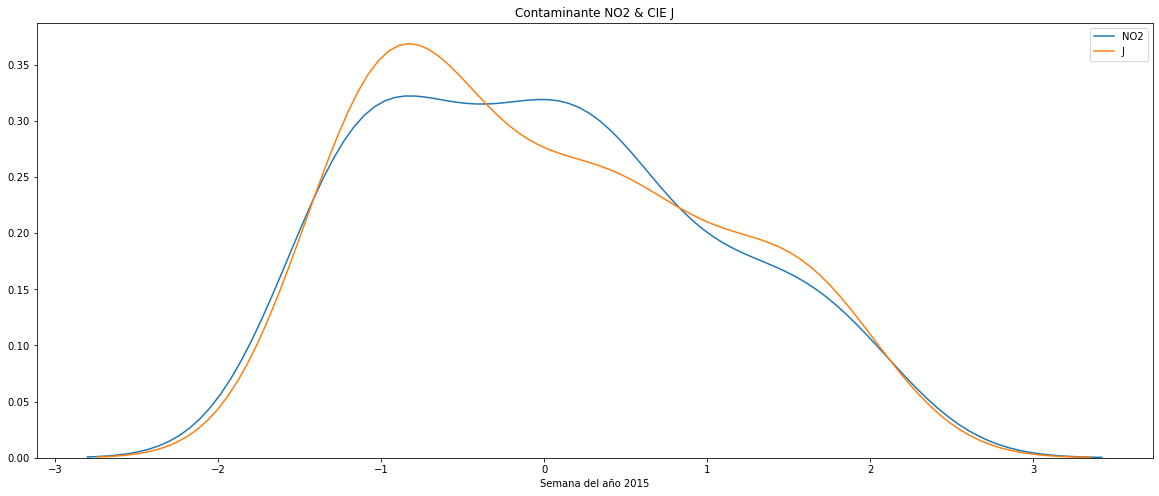

In [50]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2016)

In [51]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2016'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp        NO2
0      2016-01-01 00   7.200000
1      2016-01-01 00   1.500000
2      2016-01-01 00   9.200000
3      2016-01-01 00   7.400000
4      2016-01-01 00  10.500000
...              ...        ...
37493  2016-12-31 22  25.600000
37494  2016-12-31 23  18.600000
37495  2016-12-31 23  10.900000
37496  2016-12-31 23  39.099998
37497  2016-12-31 23  11.900000

[37498 rows x 2 columns]

In [52]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp        NO2
0     2016-01-01 00:00:00   7.200000
1     2016-01-01 00:00:00   1.500000
2     2016-01-01 00:00:00   9.200000
3     2016-01-01 00:00:00   7.400000
4     2016-01-01 00:00:00  10.500000
...                   ...        ...
37493 2016-12-31 22:00:00  25.600000
37494 2016-12-31 23:00:00  18.600000
37495 2016-12-31 23:00:00  10.900000
37496 2016-12-31 23:00:00  39.099998
37497 2016-12-31 23:00:00  11.900000

[37498 rows x 2 columns]

In [53]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp        NO2  sem
0     2016-01-01 00:00:00   7.200000   52
1     2016-01-01 00:00:00   1.500000   52
2     2016-01-01 00:00:00   9.200000   52
3     2016-01-01 00:00:00   7.400000   52
4     2016-01-01 00:00:00  10.500000   52
...                   ...        ...  ...
37493 2016-12-31 22:00:00  25.600000   52
37494 2016-12-31 23:00:00  18.600000   52
37495 2016-12-31 23:00:00  10.900000   52
37496 2016-12-31 23:00:00  39.099998   52
37497 2016-12-31 23:00:00  11.900000   52

[37498 rows x 3 columns]

In [54]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        12/30/2015 00:00     N185
1        12/31/2015 00:00     N185
2        12/31/2015 00:00     N185
3        01/02/2016 00:00     N185
4        01/02/2016 00:00     N185
...                   ...      ...
1048570  08/24/2016 00:00     E115
1048571  08/17/2016 00:00     O809
1048572  08/21/2016 00:00     O809
1048573  08/22/2016 00:00     O809
1048574  08/19/2016 00:00     O809

[1048574 rows x 2 columns]

In [55]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%m/%d/%Y %H:%M'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2016-01-02     N185   52
1       2016-01-02     N185   52
2       2016-01-02     N185   52
3       2016-01-02     N185   52
4       2016-01-02     N185   52
...            ...      ...  ...
1032801 2016-08-24     E115   34
1032802 2016-08-17     O809   33
1032803 2016-08-21     O809   34
1032804 2016-08-22     O809   34
1032805 2016-08-19     O809   33

[1032806 rows x 3 columns]

In [56]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     17589
2     19491
3     19832
4     20191
5     19086
6     20157
7     19888
8     20511
9     20626
10    20529
11    20988
12    17365
13    19319
14    20001
15    20455
16    19735
17    20120
18    19200
19    19319
20    19965
21    20731
22    19958
23    20423
24    20138
25    19626
26    19910
27    20014
28    20014
29    20375
30    20131
31    20075
32    20357
33    20336
34    20555
35    20810
36    21251
37    20265
38    21211
39    21159
40    20842
41    20627
42    20497
43    20288
44    18737
45    19961
46    19748
47    18405
48    19142
49    18985
50    18585
51    18338
52    16945
Name: sem, dtype: int64

In [57]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NO2
0     1  11.7727
1     2  13.8132
2     3  14.8658
3     4  14.7703
4     5  11.9571
5     6  14.0503
6     7  12.1004
7     8  9.24572
8     9  10.3807
9    10  11.3764
10   11  13.8432
11   12  9.10298
12   13  11.9131
13   14   10.056
14   15  9.34493
15   16  9.16643
16   17  11.7154
17   18  10.2017
18   19  9.19582
19   20  9.75225
20   21  10.6894
21   22  11.0956
22   23  11.0997
23   24  9.59749
24   25  7.81446
25   26  9.73404
26   27  9.65595
27   28  9.17675
28   29  7.11445
29   30  7.70301
30   31  6.56391
31   32     7.18
32   33  8.46942
33   34  7.52505
34   35  9.53002
35   36  8.80949
36   37  9.87698
37   38  9.12519
38   39  10.4468
39   40  10.6229
40   41  10.3032
41   42  10.8419
42   43  10.6263
43   44  8.76969
44   45  9.70033
45   46  10.7397
46   47  10.3836
47   48  9.63354
48   49  8.51325
49   50  10.7979
50   51  12.0848
51   52  10.2512


2016

NO2 & O809


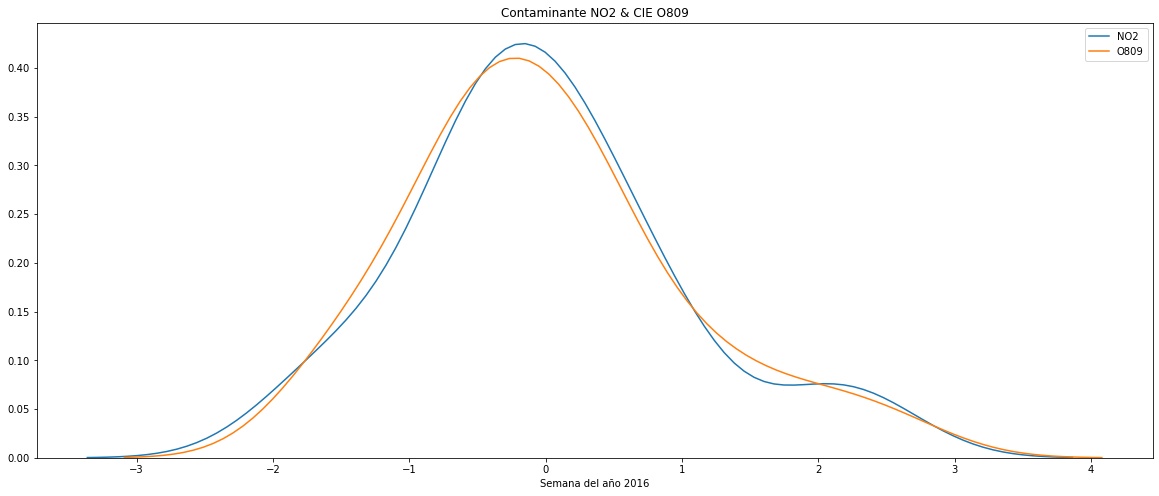


NO2 & O800


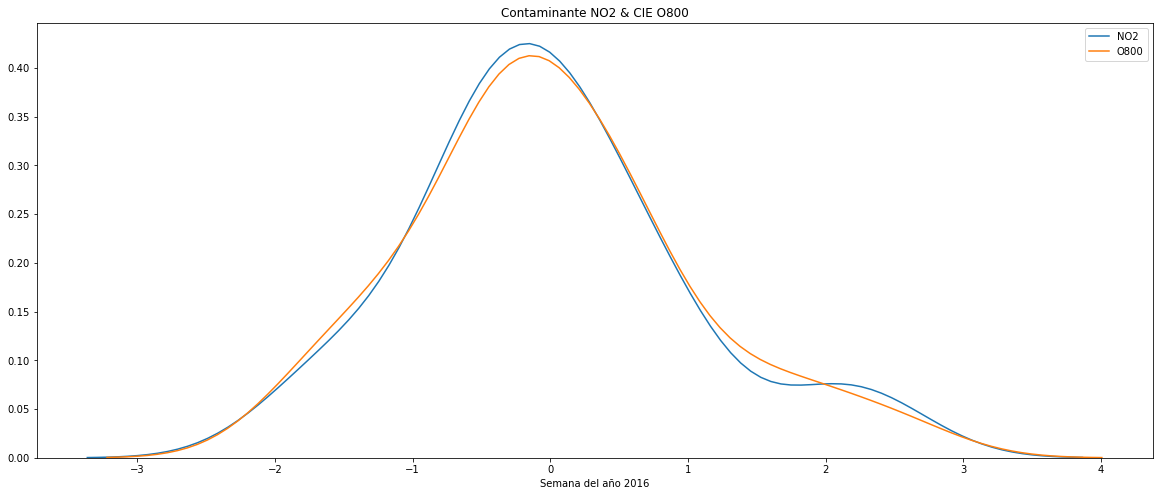


NO2 & O829


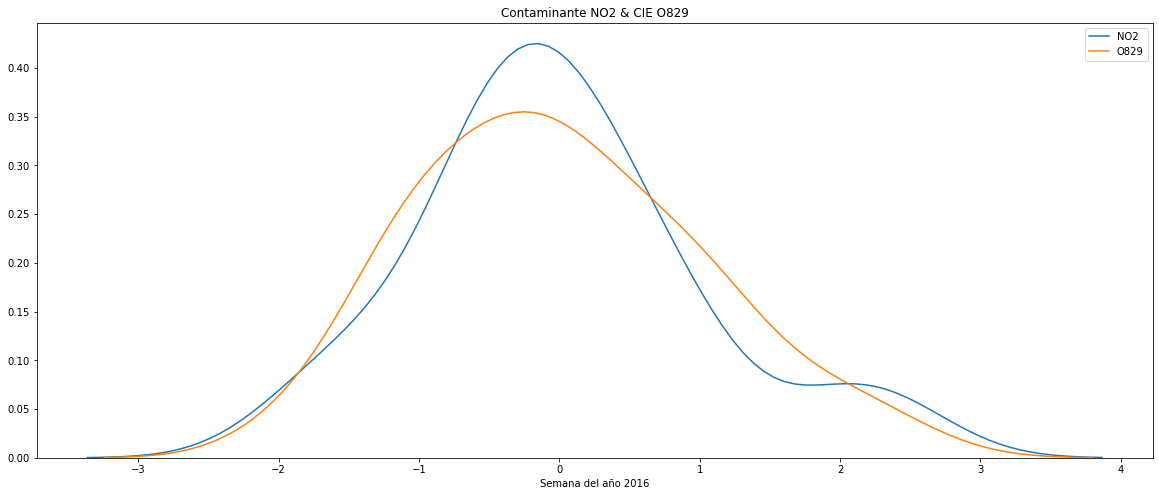


NO2 & O064


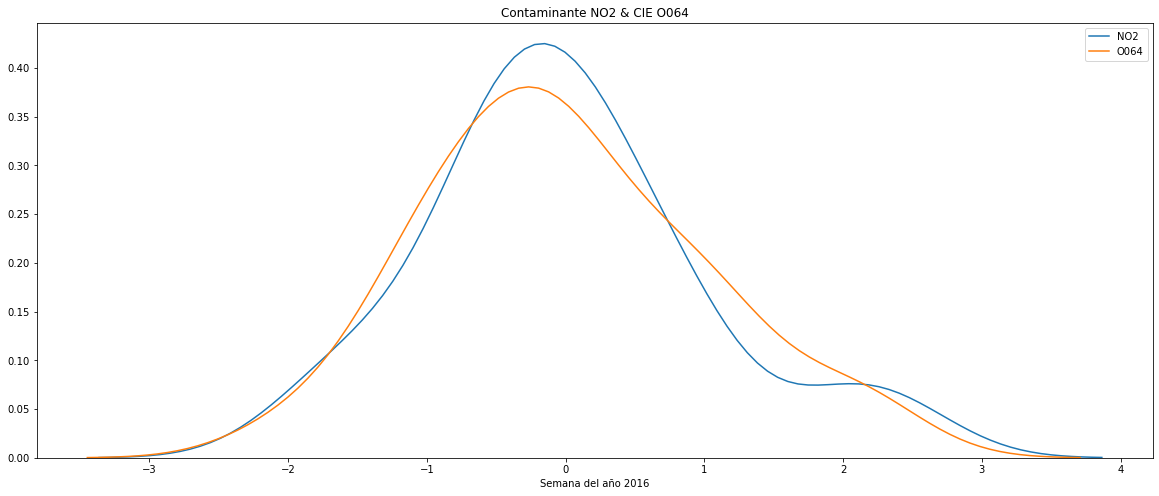


NO2 & N189


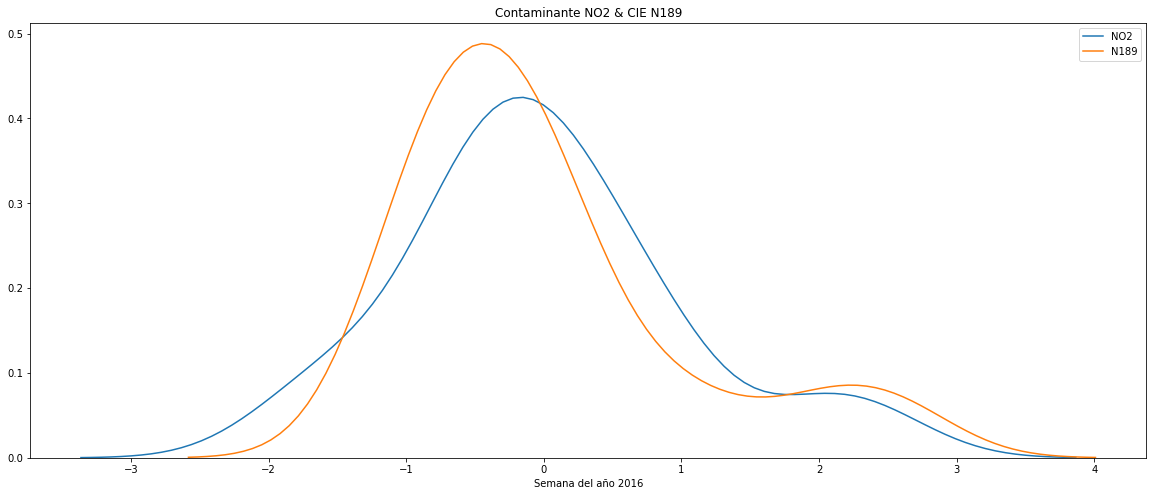


NO2 & O342


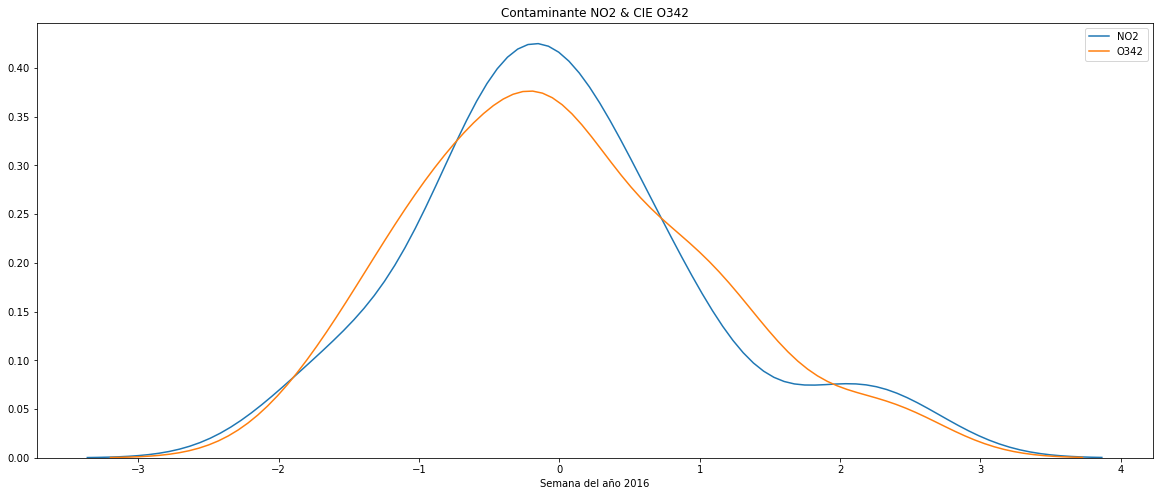


NO2 & K358


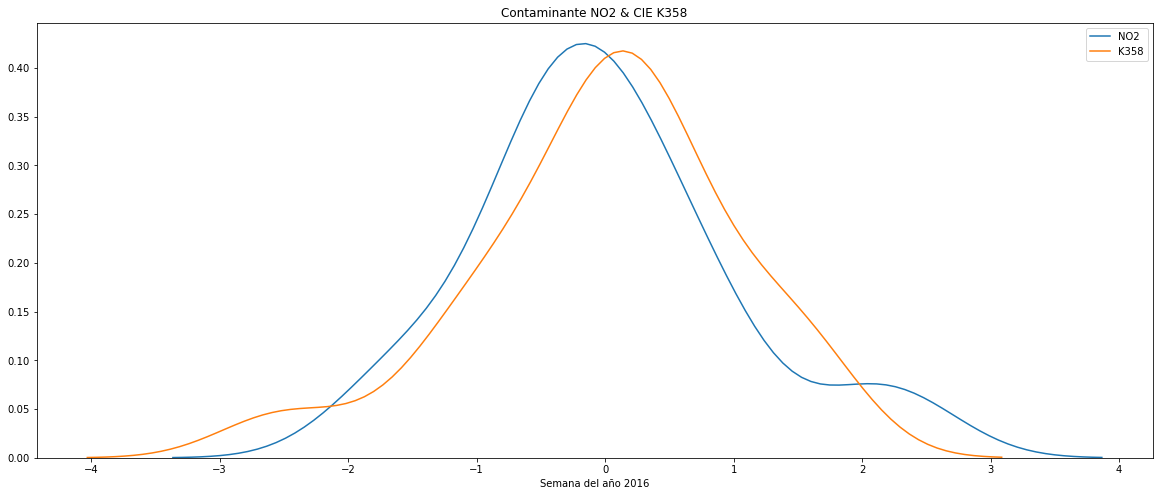


NO2 & H


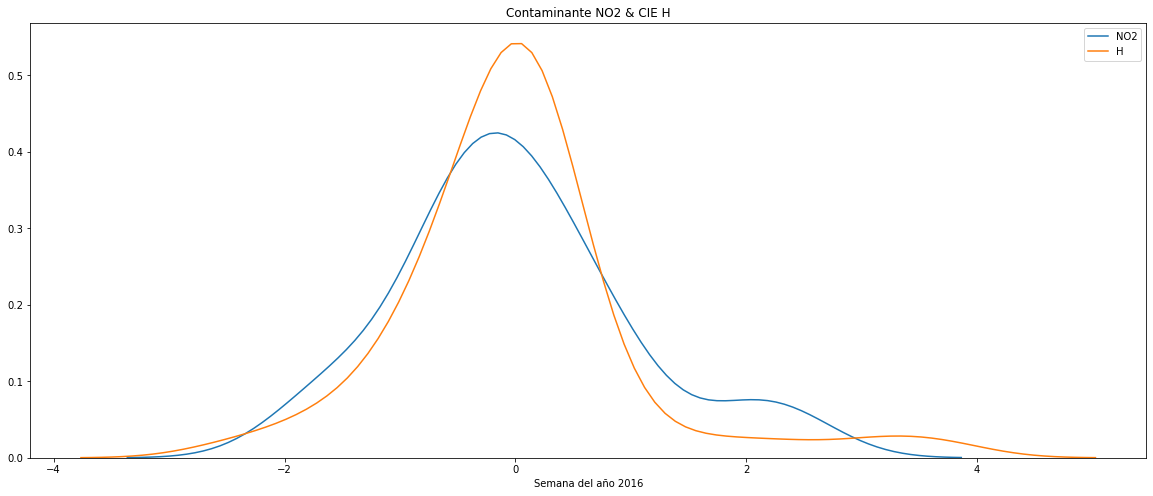


NO2 & I


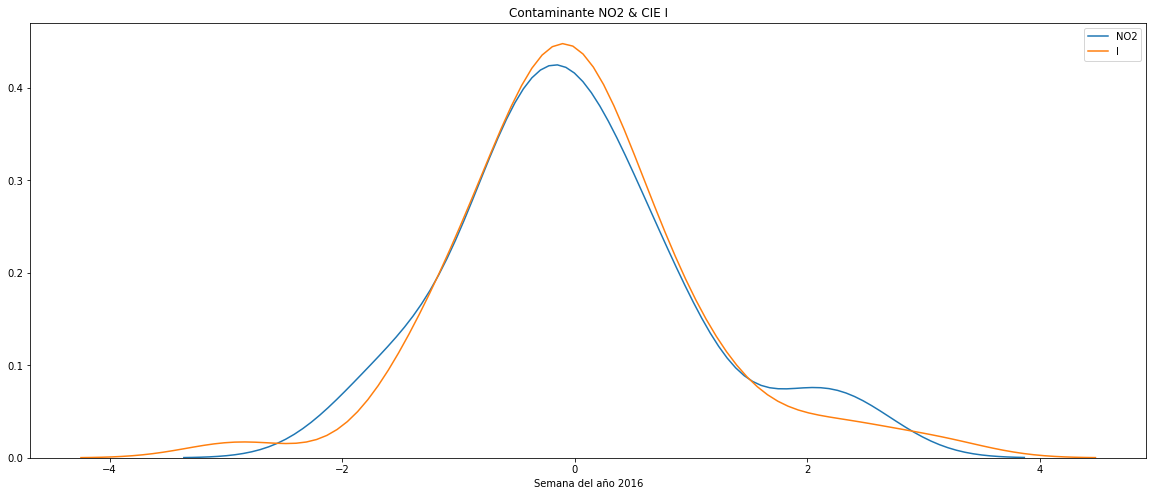


NO2 & J


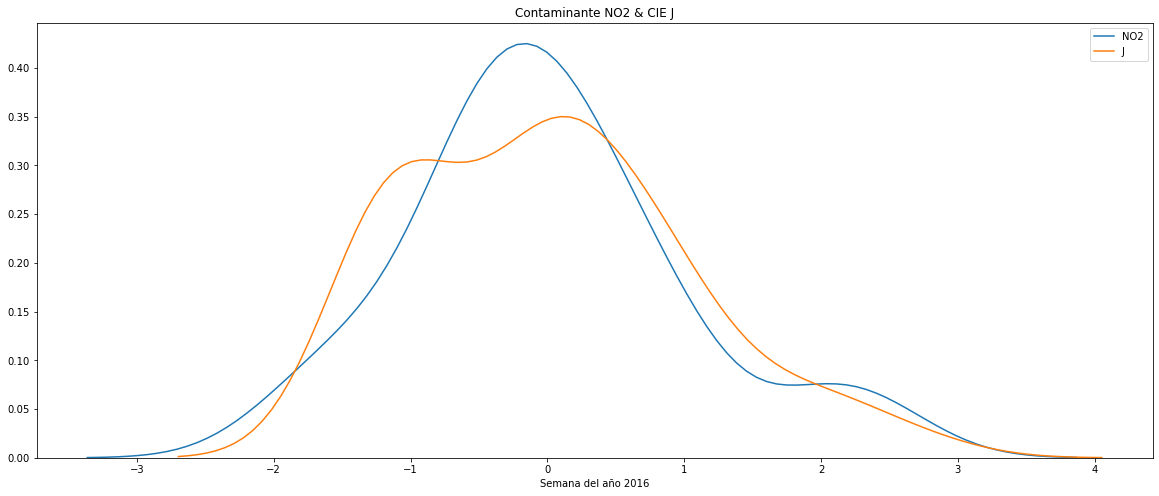

In [58]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2017)

In [59]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2017'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp   NO2
0      2017-01-01 00  15.1
1      2017-01-01 00   9.7
2      2017-01-01 00  35.2
3      2017-01-01 00  20.1
4      2017-01-01 01  11.7
...              ...   ...
44446  2017-12-31 23  13.1
44447  2017-12-31 23  10.4
44448  2017-12-31 23  17.0
44449  2017-12-31 23   5.0
44450  2017-12-31 23   4.4

[44451 rows x 2 columns]

In [60]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp   NO2
0     2017-01-01 00:00:00  15.1
1     2017-01-01 00:00:00   9.7
2     2017-01-01 00:00:00  35.2
3     2017-01-01 00:00:00  20.1
4     2017-01-01 01:00:00  11.7
...                   ...   ...
44446 2017-12-31 23:00:00  13.1
44447 2017-12-31 23:00:00  10.4
44448 2017-12-31 23:00:00  17.0
44449 2017-12-31 23:00:00   5.0
44450 2017-12-31 23:00:00   4.4

[44451 rows x 2 columns]

In [61]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp   NO2  sem
0     2017-01-01 00:00:00  15.1    1
1     2017-01-01 00:00:00   9.7    1
2     2017-01-01 00:00:00  35.2    1
3     2017-01-01 00:00:00  20.1    1
4     2017-01-01 01:00:00  11.7    1
...                   ...   ...  ...
44446 2017-12-31 23:00:00  13.1    1
44447 2017-12-31 23:00:00  10.4    1
44448 2017-12-31 23:00:00  17.0    1
44449 2017-12-31 23:00:00   5.0    1
44450 2017-12-31 23:00:00   4.4    1

[44451 rows x 3 columns]

In [62]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, sep='|', usecols=colums, nrows=1500000).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0        2017-02-13 00:00:00     O809
1        2017-03-12 00:00:00     O809
2        2017-04-12 00:00:00     E86X
3        2017-05-13 00:00:00     O809
4        2017-06-14 00:00:00     I219
...                      ...      ...
1499995  2017-08-04 00:00:00     O809
1499996  2017-08-04 00:00:00     O809
1499997  2017-08-04 00:00:00     O064
1499998  2017-08-04 00:00:00     O064
1499999  2017-08-04 00:00:00     O064

[1500000 rows x 2 columns]

In [63]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0       2017-02-13     O809    7
1       2017-03-12     O809   11
2       2017-04-12     E86X   15
3       2017-05-13     O809   19
4       2017-06-14     I219   24
...            ...      ...  ...
1499995 2017-08-04     O809   31
1499996 2017-08-04     O809   31
1499997 2017-08-04     O064   31
1499998 2017-08-04     O064   31
1499999 2017-08-04     O064   31

[1500000 rows x 3 columns]

In [64]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     29887
2     30924
3     32383
4     32156
5     32001
6     30230
7     32552
8     31518
9     31718
10    32476
11    31829
12    29294
13    29940
14    28557
15    26151
16    26885
17    27700
18    24600
19    26186
20    27410
21    27306
22    26797
23    27708
24    28105
25    27789
26    27284
27    27648
28    27696
29    27579
30    26725
31    27417
32    28836
33    28370
34    28507
35    29005
36    29782
37    30581
38    30630
39    29696
40    30454
41    30531
42    30724
43    30116
44    28700
45    30153
46    30218
47    26720
48    28416
49    28652
50    27196
51    25701
52    20561
Name: sem, dtype: int64

In [65]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NO2
0     1  11.9655
1     2  14.2167
2     3  10.9712
3     4  13.0543
4     5  13.8798
5     6  13.2262
6     7  12.0773
7     8  15.9044
8     9  13.3268
9    10  13.5338
10   11  12.8517
11   12  11.9936
12   13  13.6528
13   14  11.4135
14   15  7.96634
15   16  10.1562
16   17  12.8606
17   18  12.1057
18   19  11.7198
19   20  9.68588
20   21  11.4397
21   22  10.3078
22   23  11.0011
23   24  10.2182
24   25  10.9394
25   26    9.167
26   27      7.9
27   28  8.39282
28   29  9.26082
29   30  8.41818
30   31  10.7516
31   32  9.41844
32   33  8.47428
33   34   7.3435
34   35   9.0057
35   36  9.13711
36   37  11.4082
37   38  6.04931
38   39  6.90664
39   40  9.52475
40   41  11.7996
41   42  13.5728
42   43  13.1836
43   44  17.3768
44   45   14.783
45   46   15.454
46   47  20.9844
47   48  16.3476
48   49  15.3862
49   50  23.2164
50   51  23.0155
51   52  16.7585


2017

NO2 & O809


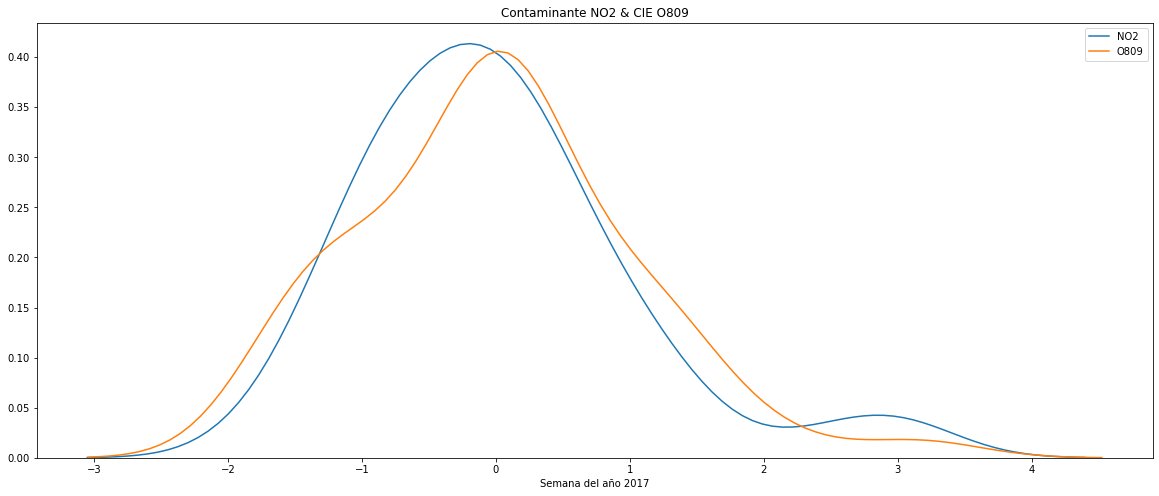


NO2 & N189


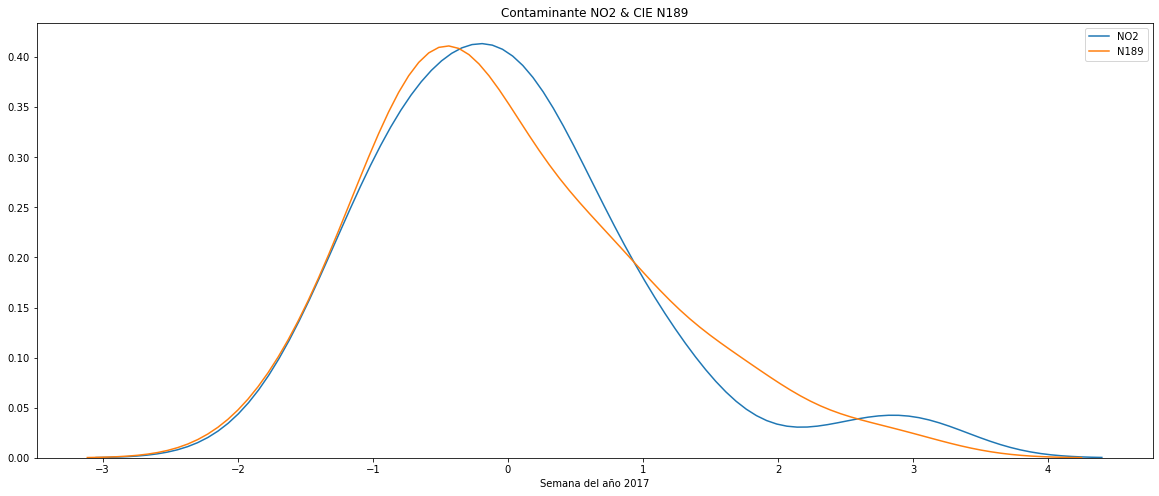


NO2 & O800


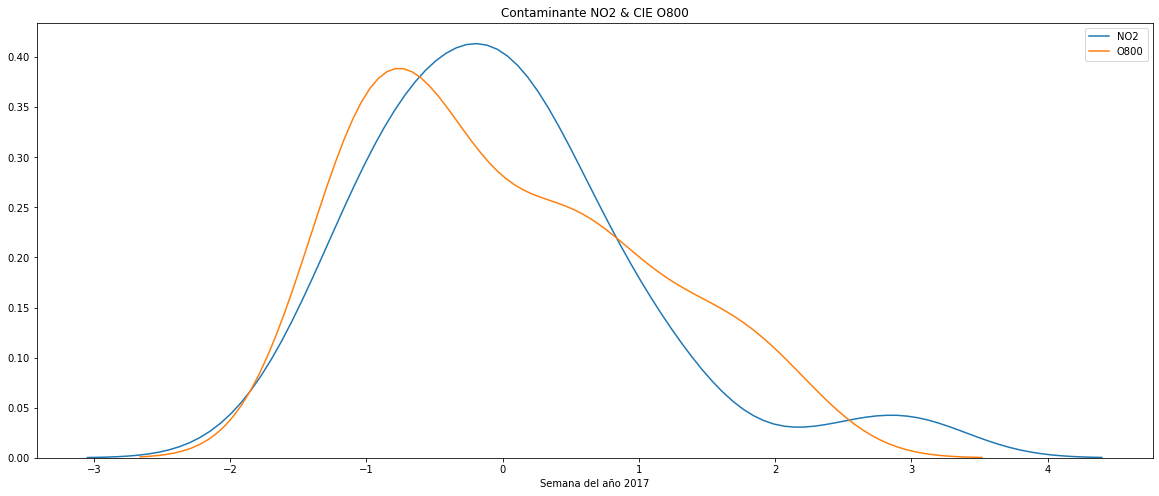


NO2 & O829


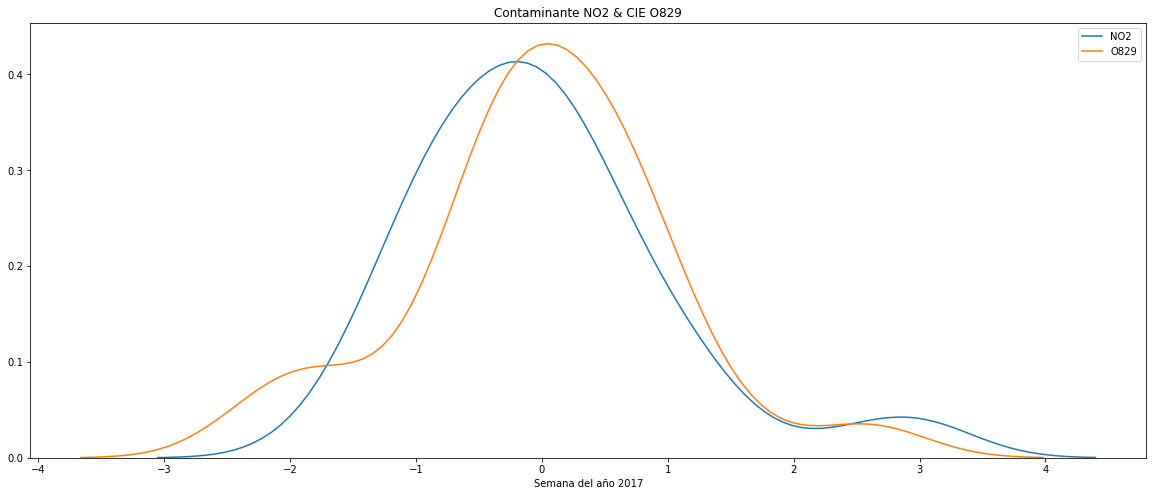


NO2 & O064


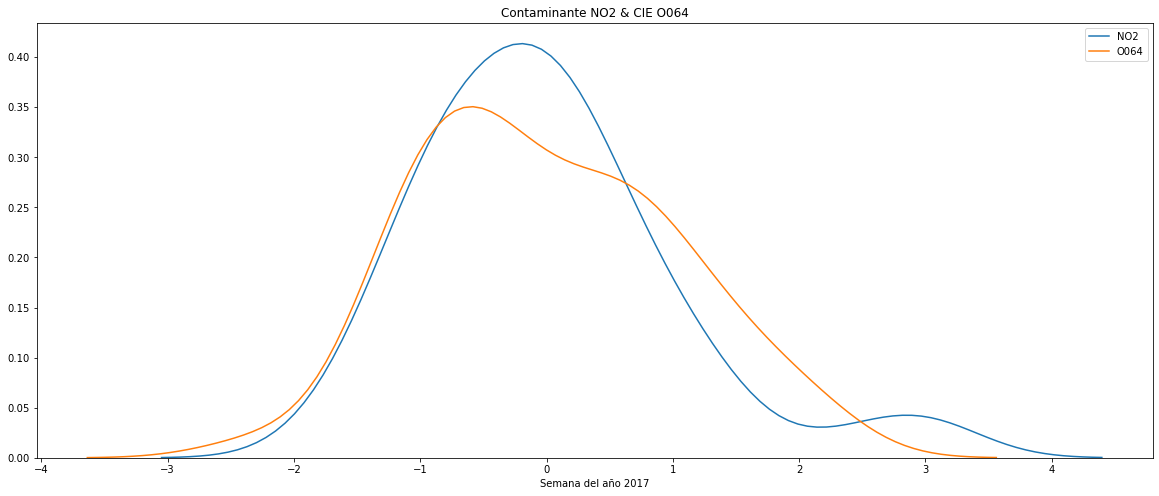


NO2 & N185


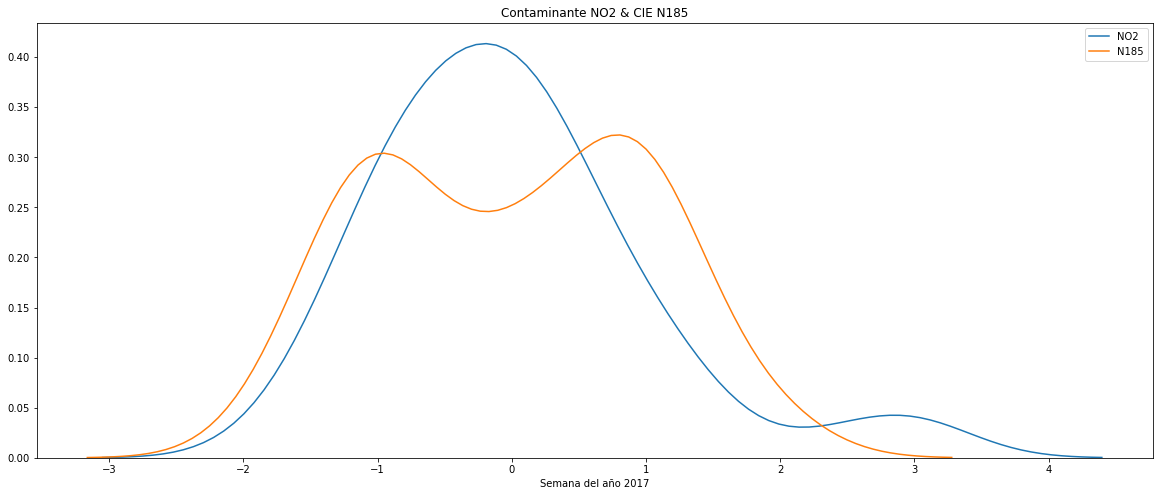


NO2 & C509


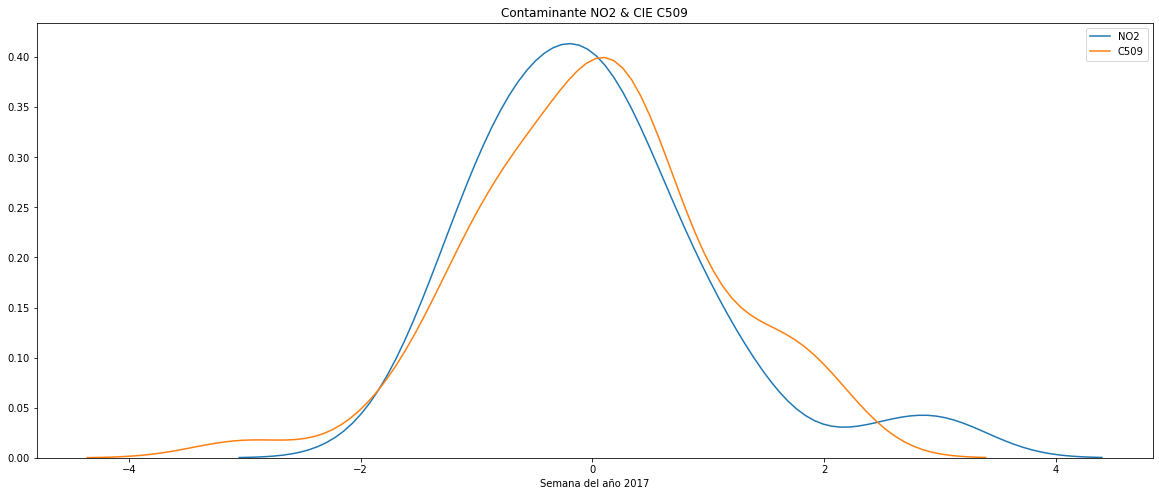


NO2 & H


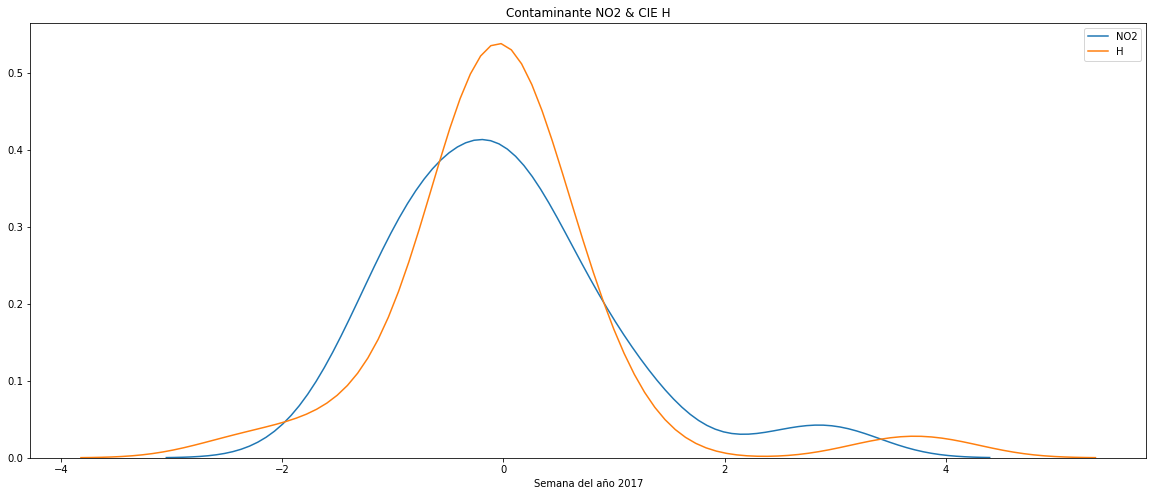


NO2 & I


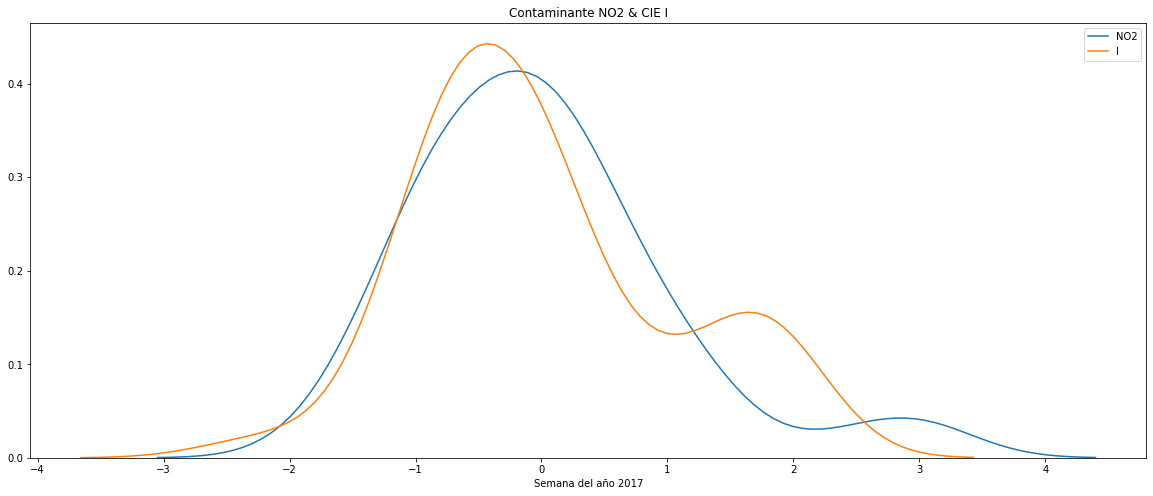


NO2 & J


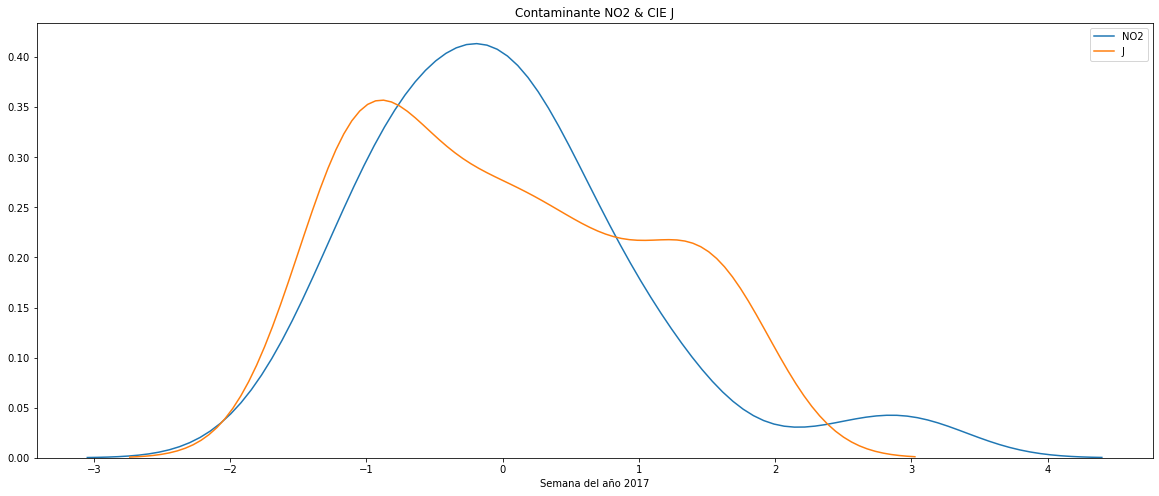

In [66]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1

# (Año 2018)

In [67]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2018'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

timestamp        NO2
0      2018-01-01 01   2.900000
1      2018-01-01 01  15.200000
2      2018-01-01 01   2.900000
3      2018-01-01 01  17.800000
4      2018-01-01 01   3.600000
...              ...        ...
41615  2018-12-31 23  21.600000
41616  2018-12-31 23  31.400000
41617  2018-12-31 23   8.400000
41618  2018-12-31 23  11.800000
41619  2018-12-31 23  59.900002

[41620 rows x 2 columns]

In [68]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

timestamp        NO2
0     2018-01-01 01:00:00   2.900000
1     2018-01-01 01:00:00  15.200000
2     2018-01-01 01:00:00   2.900000
3     2018-01-01 01:00:00  17.800000
4     2018-01-01 01:00:00   3.600000
...                   ...        ...
41615 2018-12-31 23:00:00  21.600000
41616 2018-12-31 23:00:00  31.400000
41617 2018-12-31 23:00:00   8.400000
41618 2018-12-31 23:00:00  11.800000
41619 2018-12-31 23:00:00  59.900002

[41620 rows x 2 columns]

In [69]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

timestamp        NO2  sem
0     2018-01-01 01:00:00   2.900000    1
1     2018-01-01 01:00:00  15.200000    1
2     2018-01-01 01:00:00   2.900000    1
3     2018-01-01 01:00:00  17.800000    1
4     2018-01-01 01:00:00   3.600000    1
...                   ...        ...  ...
41615 2018-12-31 23:00:00  21.600000    1
41616 2018-12-31 23:00:00  31.400000    1
41617 2018-12-31 23:00:00   8.400000    1
41618 2018-12-31 23:00:00  11.800000    1
41619 2018-12-31 23:00:00  59.900002    1

[41620 rows x 3 columns]

In [70]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI']
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums, nrows=1000000).dropna()
dataframeegresosaño

EGRESO DIAG_INI
0       2018-03-11 00:00:00.000     Z524
1       2018-03-15 00:00:00.000     D259
2       2018-04-07 00:00:00.000     M169
3       2018-04-06 00:00:00.000     Q539
4       2018-04-19 00:00:00.000     N185
...                         ...      ...
999995  2018-04-24 00:00:00.000     E042
999996  2018-04-24 00:00:00.000     K802
999997  2018-04-27 00:00:00.000     K603
999998  2018-04-28 00:00:00.000     R69X
999999  2018-04-26 00:00:00.000     M179

[1000000 rows x 2 columns]

In [71]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S.000'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

EGRESO DIAG_INI  sem
0      2018-03-11     Z524   11
1      2018-03-15     D259   11
2      2018-04-07     M169   14
3      2018-04-06     Q539   14
4      2018-04-19     N185   16
...           ...      ...  ...
999995 2018-04-24     E042   17
999996 2018-04-24     K802   17
999997 2018-04-27     K603   17
999998 2018-04-28     R69X   17
999999 2018-04-26     M179   17

[1000000 rows x 3 columns]

In [72]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     17995
2     18415
3     19382
4     19381
5     19586
6     18117
7     19495
8     19463
9     19664
10    19664
11    20214
12    19257
13    17852
14    18507
15    19268
16    19680
17    19987
18    18283
19    19175
20    19921
21    20048
22    19846
23    19602
24    19141
25    18905
26    18857
27    19181
28    19413
29    19496
30    19698
31    19275
32    19323
33    19547
34    19931
35    19964
36    20534
37    20509
38    20569
39    19922
40    20303
41    19961
42    19705
43    19605
44    18409
45    19046
46    19528
47    17902
48    18747
49    18328
50    18415
51    17870
52    15114
Name: sem, dtype: int64

In [73]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

sem      NO2
0     1  16.2324
1     2  20.3301
2     3  17.7237
3     4  17.3244
4     5  18.1677
5     6  17.8487
6     7  18.3951
7     8  16.6636
8     9  13.7861
9    10  11.6133
10   11  10.7305
11   12  11.1596
12   13  10.8244
13   14  13.0276
14   15  10.9438
15   16  10.6764
16   17  9.53209
17   18  13.3779
18   19  11.2057
19   20  8.64623
20   21  7.84735
21   22  9.79658
22   23  10.3822
23   24  10.7068
24   25    14.71
25   26  10.8746
26   27  13.2891
27   28  16.3882
28   29  11.0805
29   30  11.1616
30   31   12.826
31   32  12.7268
32   33  12.4313
33   34  10.6526
34   35  11.2044
35   36  10.1129
36   37  8.67898
37   38  8.67776
38   39  9.55426
39   40  10.6372
40   41  10.9984
41   42  14.6653
42   43  17.3147
43   44  16.0857
44   45  16.7918
45   46  21.2188
46   47  19.9898
47   48  23.5164
48   49   18.442
49   50  20.0705
50   51  23.6995
51   52  18.5715


2018

NO2 & O809


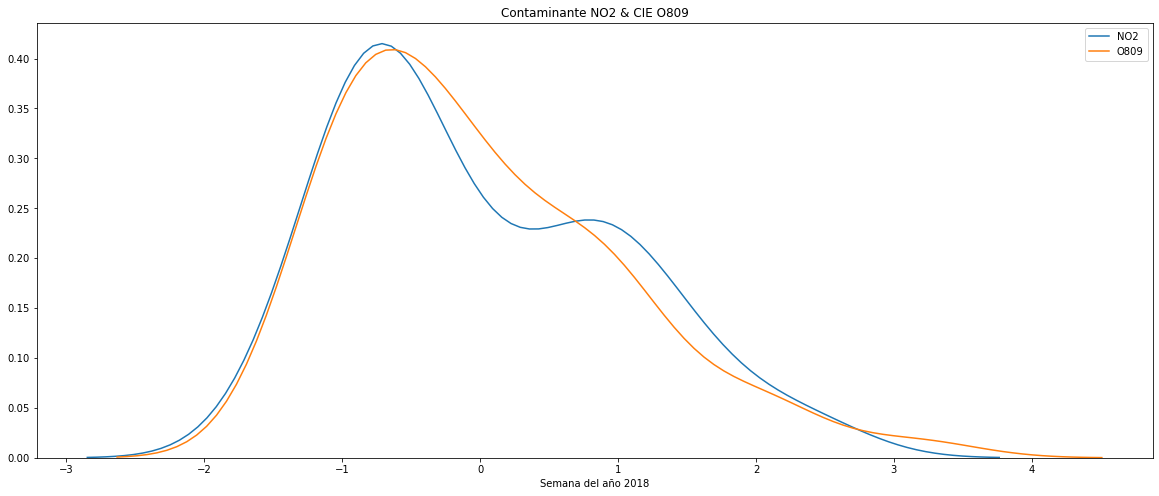


NO2 & O800


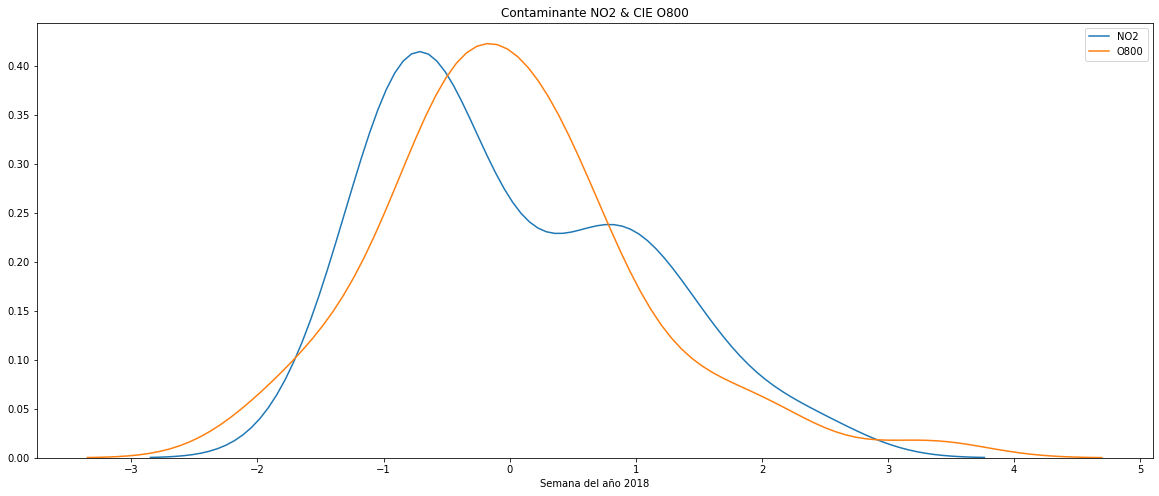


NO2 & O829


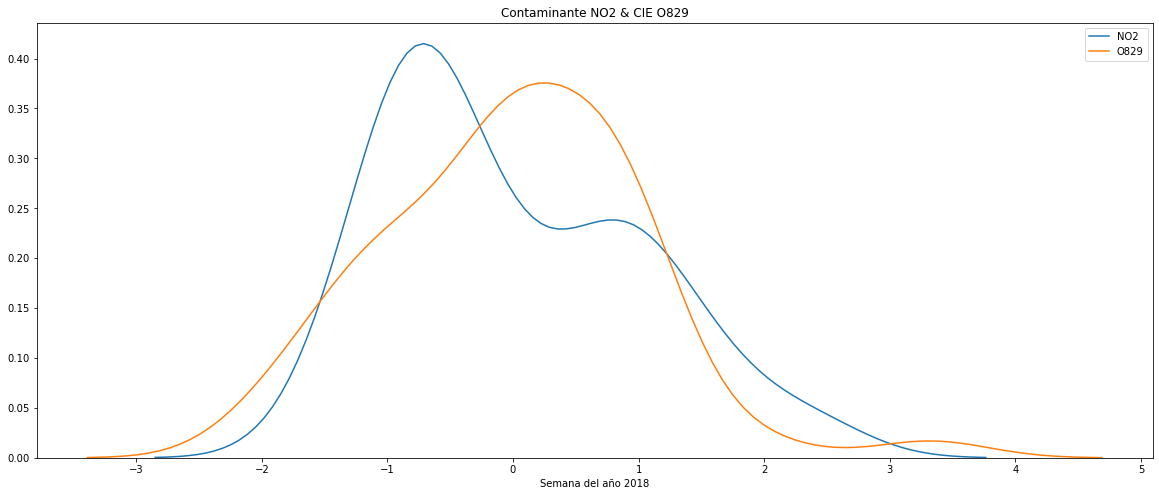


NO2 & N189


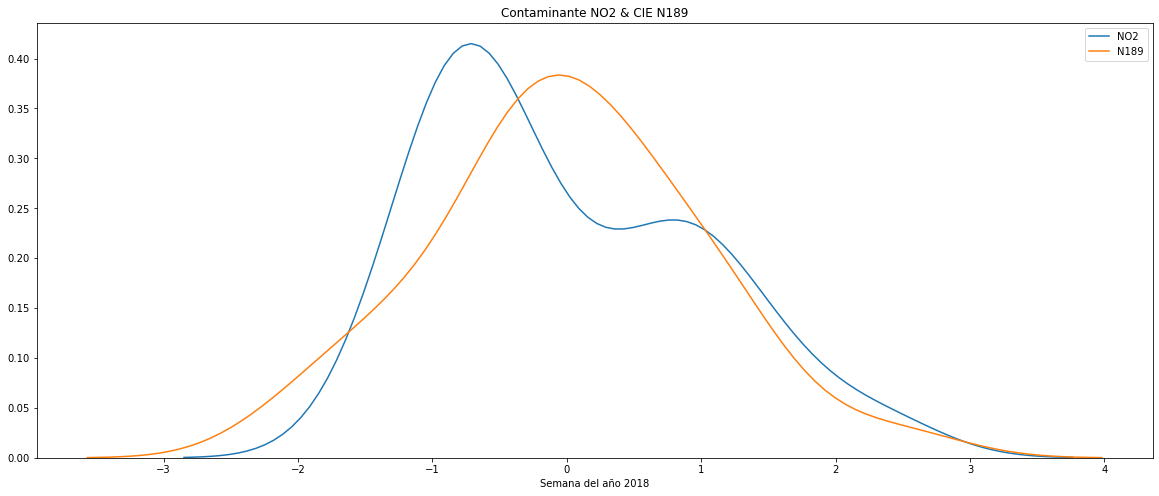


NO2 & O064


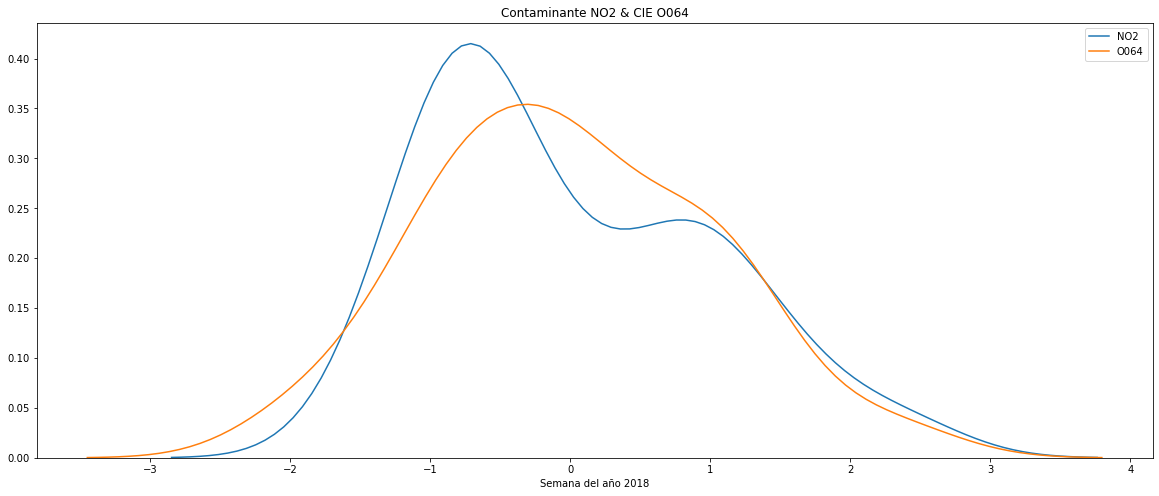


NO2 & C509


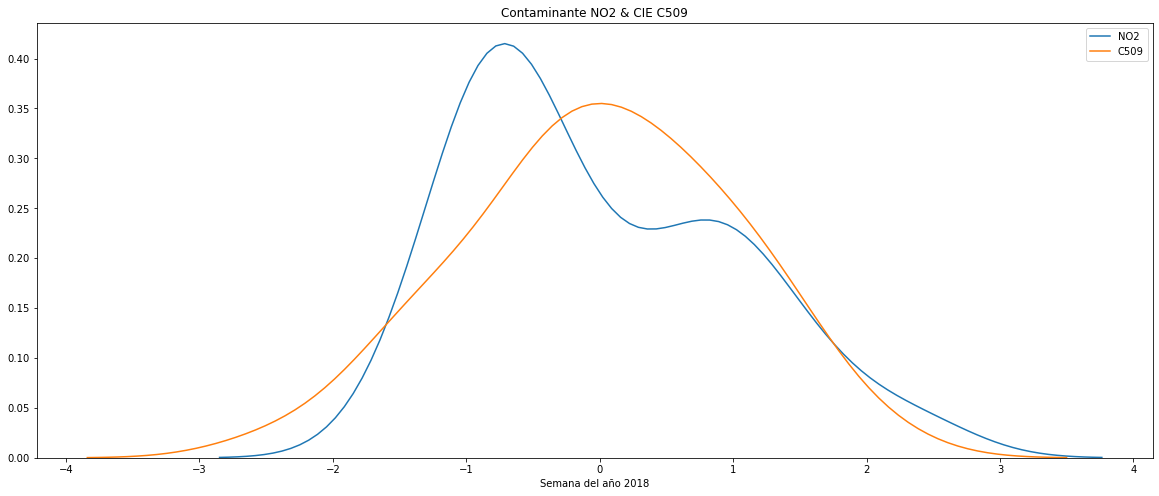


NO2 & O342


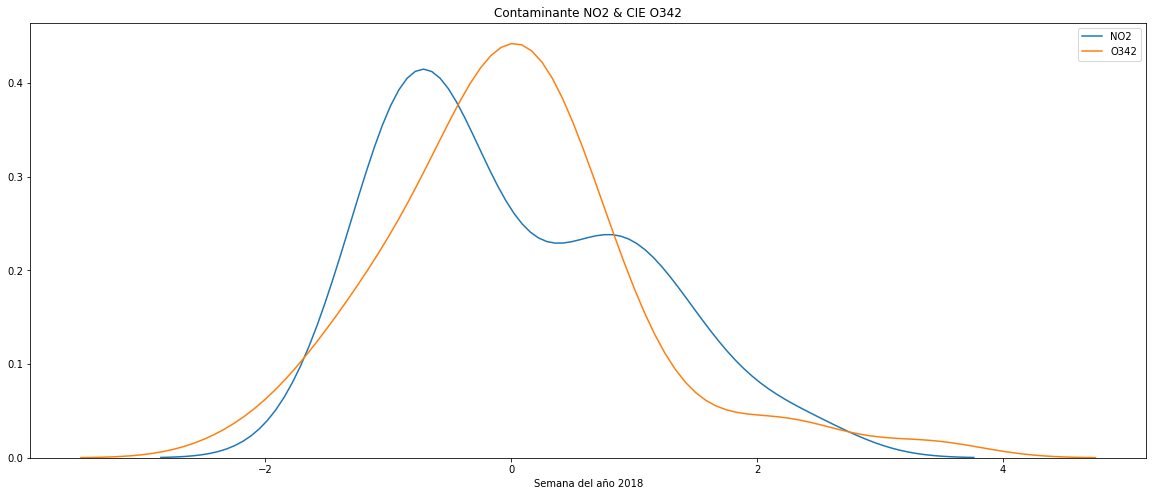


NO2 & H


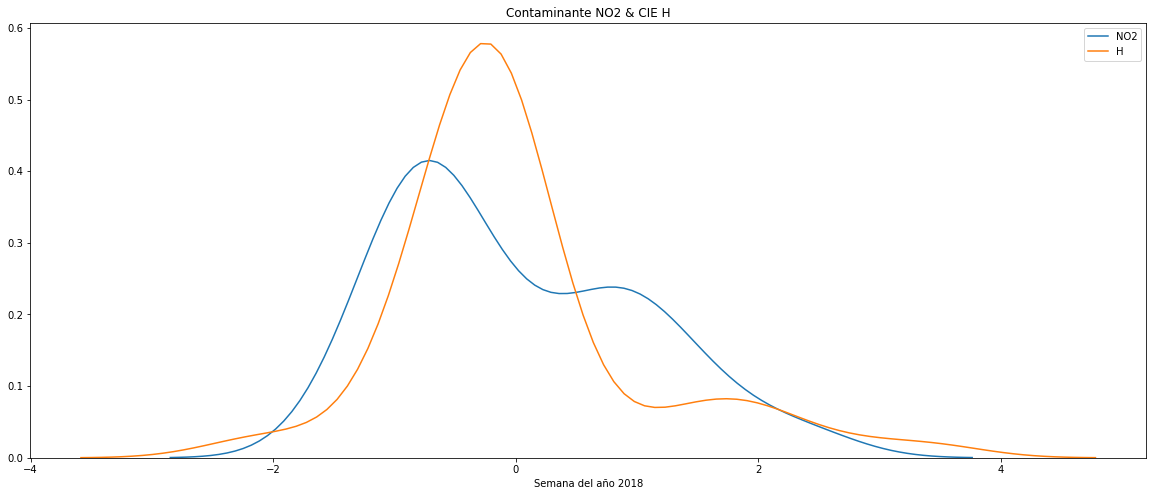


NO2 & I


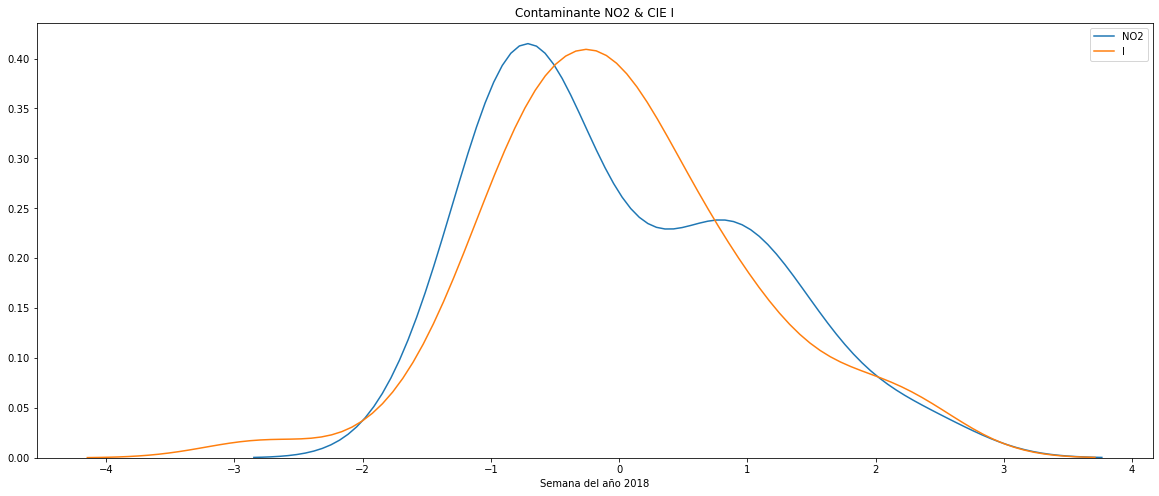


NO2 & J


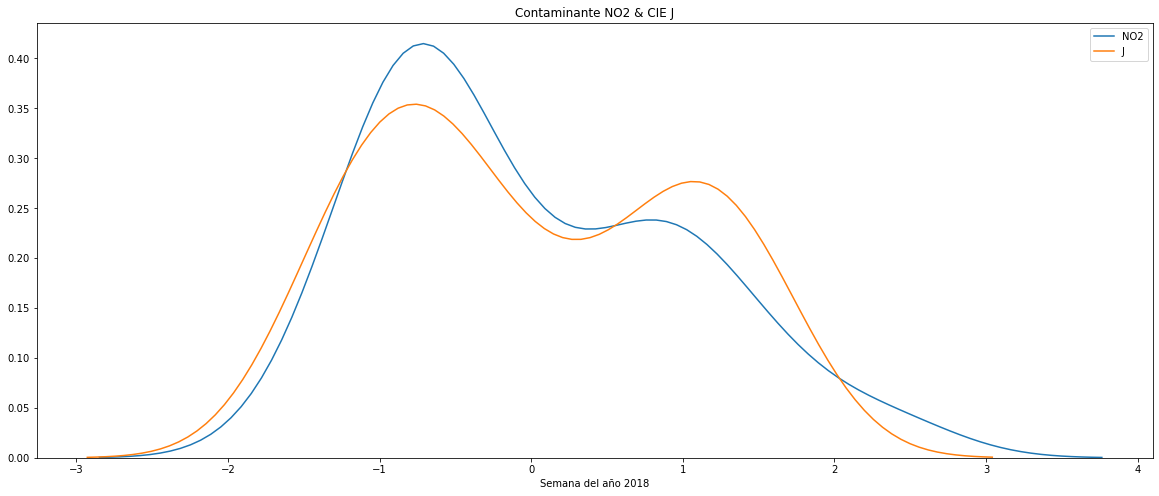

In [74]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 10
mindividuales = 7

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        if cont < mindividuales:
            dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, name]    
        else:
            nameg =  letras[cont]
            ciesagrupadas = dataframeegresosaño.loc[dataframeegresosaño['DIAG_INI'].str.startswith(nameg)]
            ciesagrupadas = ciesagrupadas['sem'].value_counts()
            dataframegraficoañocontaminantecie[nameg] = ciesagrupadas
            for i in range (n):
                dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
            col_names = [contaminante, nameg]
        df_s = s_scaler.fit_transform(dataframegraficoañocontaminantecie)
        df_s = pd.DataFrame(df_s, columns=col_names)
        fig, ax = plt.subplots(ncols=1, figsize=(20, 8))
        print('\n' + col_names[0] + ' & ' + col_names[1])
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel('Semana del año ' + año)
        sns.kdeplot(df_s[col_names[0]])
        sns.kdeplot(df_s[col_names[1]])
        plt.savefig(contaminante + '/' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')
        plt.show()
    cont = cont+1